Data source:https://www.kaggle.com/datasets/purumalgi/music-genre-classification
https://machinehack.com/hackathons/music_genre_classification_weekend_hackathon_edition_2_the_last_hacker_standing/overview

The description of variables(columns)

Artist Name: The name of the artist who performed or created the track. This is a categorical text variable, useful for identifying tracks by specific artists.

Track Name: The title of the music track. Like 'Artist Name', this is a categorical text variable and can be used to identify specific songs or styles within an artist's work.

Popularity: A numerical score typically ranging from 0 to 100 that reflects the current popularity of the track. Higher values indicate greater popularity.

Danceability: A measure from 0.0 to 1.0 indicating how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. Higher values suggest the track is more danceable.

Energy: A measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

Key: The key the track is in, encoded as integers where C=0, C#=1, D=2, etc., up to B=11. It can reflect the tonal center of the music.

Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for understanding the relative loudness of tracks in a dataset.

Mode: Indicates the modality (major or minor) of a track, derived from the scale used. Mode is binary (0 = minor, 1 = major), and major is generally associated with a happier and brighter sound.

Speechiness: Measures the presence of spoken words in a track. A higher value indicates that the track contains more spoken word content (e.g., talk shows, audio books, poetry).

Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic. Higher values represent a higher likelihood the track is acoustic.

Instrumentalness: Predicts whether a track contains no vocals. Values closer to 1.0 indicate the track contains no vocal content (instrumental), which might be important for certain applications like background music.

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric).

Tempo: The overall estimated tempo of a track in beats per minute (BPM). Tempo is a useful feature for genre classification as certain genres often fall into specific tempo ranges.

Duration in min/ms: The length of the track either in minutes or milliseconds, a numeric variable that can influence the structure and style of a track.

Time Signature: A notational convention to specify how many beats are in each bar (or measure). Common time signatures include 4 (common time), which is very typical in most forms of music.

Class: This is the target variable for classification tasks. It likely represents a numeric encoding of different music genres or classes.

Class label meanings:

Acoustic/Folk:0

Alt_Music:1

Blues: 2

Bollywood:3

Country:4

HipHop:5

Indie Alt:6

Instrumental: 7

Metal:8

Pop:9

Rock:10


Part 1. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv("music.csv")
print(df.dtypes)

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object


In [3]:
print(df.head(10))
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns.") #number of rows and columns

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                The Stooges      Search and Destroy - Iggy Pop Mix   
6              Solomon Burke                    None Of Us Are Free   
7               Randy Travis                      On the Other Hand   
8  Professional Murder Music                                   Slow   
9                Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   

   Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406

In [4]:
inds = df.columns
for i in inds:
    print(df[i].describe())

count               17996
unique               9149
top       Backstreet Boys
freq                   69
Name: Artist Name, dtype: object
count      17996
unique     15129
top       Dreams
freq           9
Name: Track Name, dtype: object
count    17568.000000
mean        44.512124
std         17.426928
min          1.000000
25%         33.000000
50%         44.000000
75%         56.000000
max        100.000000
Name: Popularity, dtype: float64
count    17996.000000
mean         0.543433
std          0.166268
min          0.059600
25%          0.432000
50%          0.545000
75%          0.659000
max          0.989000
Name: danceability, dtype: float64
count    17996.000000
mean         0.662777
std          0.235373
min          0.000020
25%          0.509000
50%          0.700000
75%          0.860000
max          1.000000
Name: energy, dtype: float64
count    15982.000000
mean         5.952447
std          3.196854
min          1.000000
25%          3.000000
50%          6.000000
75%   

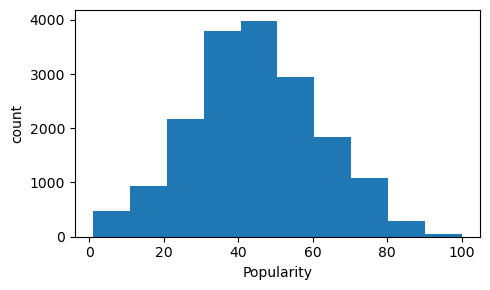

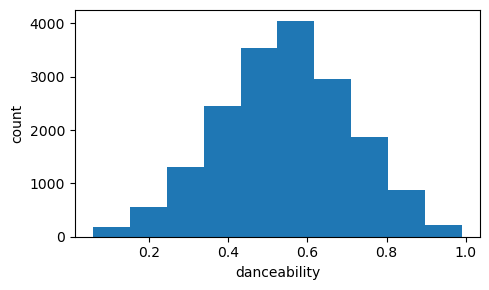

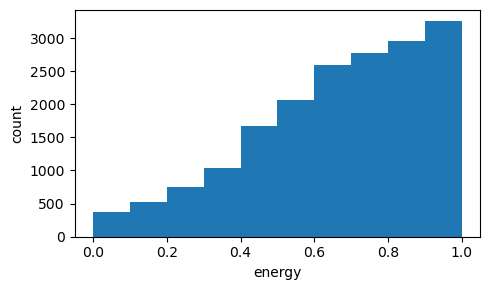

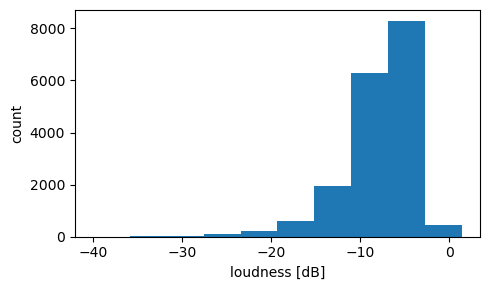

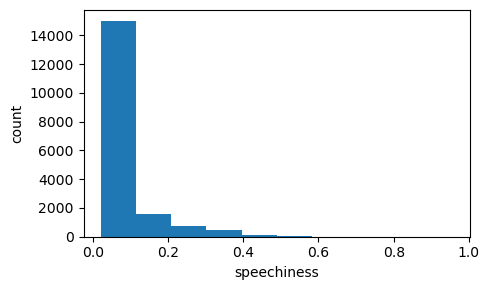

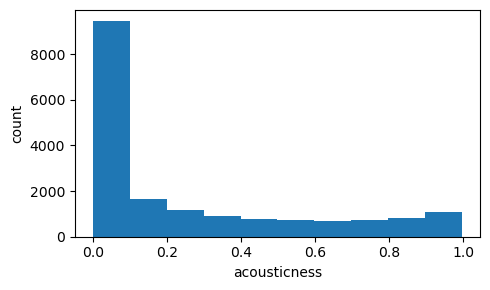

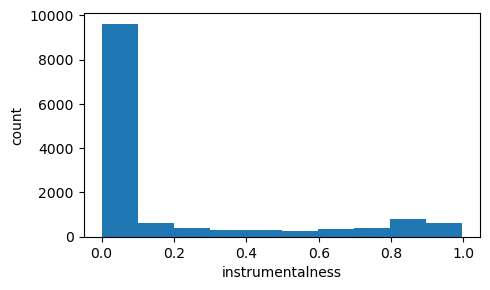

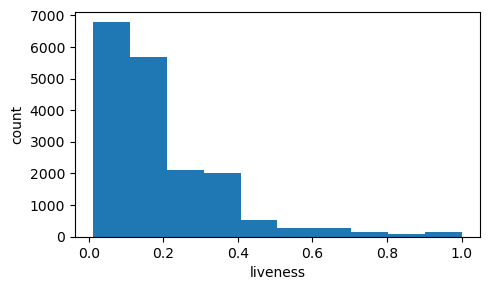

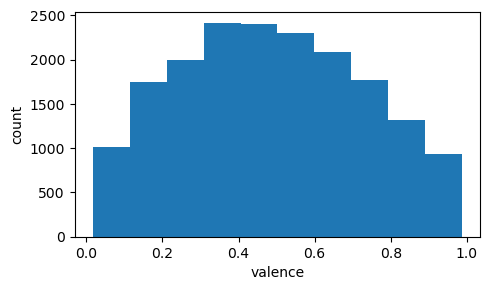

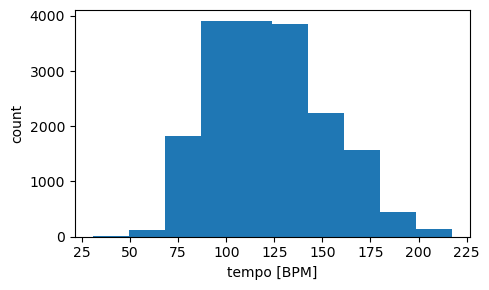

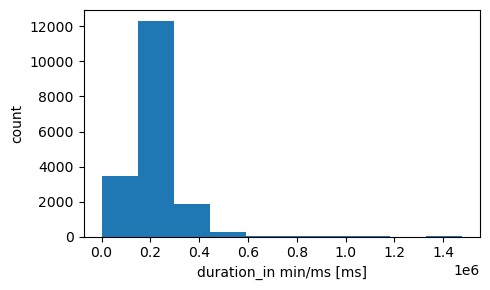

In [28]:
#plotting histograms for continuous variables/features
for i in ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_in min/ms"]:
    plt.figure(figsize = (5,3))
    df[i].plot.hist()
    if i == "tempo":
        plt.xlabel(f"{i} [BPM]")
    elif i == "duration_in min/ms":
        plt.xlabel(f"{i} [ms]")
    elif i == "loudness":
        plt.xlabel(f"{i} [dB]")
    else: 
        plt.xlabel(f"{i}")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

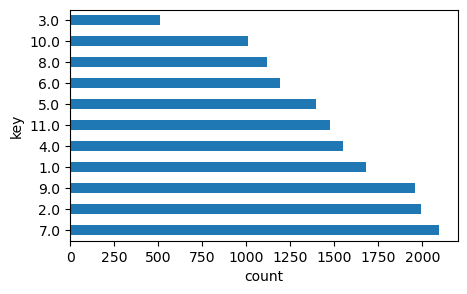

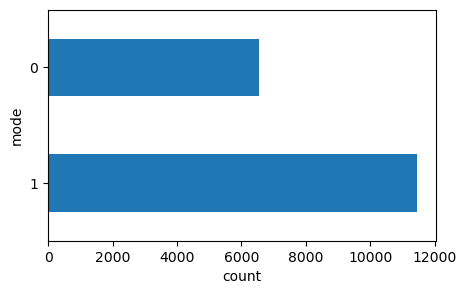

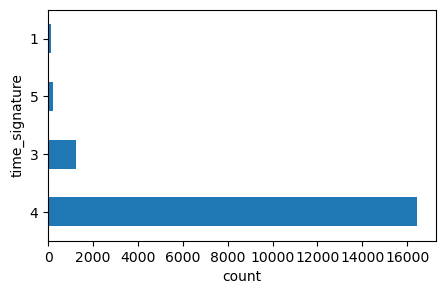

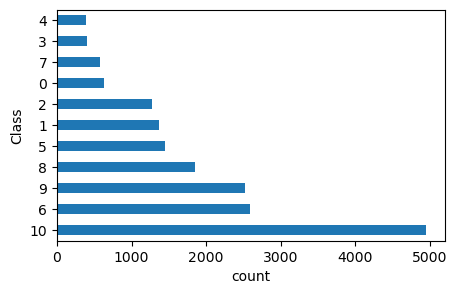

In [6]:
#plotting bar plots for categorical variables/features and the target variable class
for i in ["key","mode","time_signature","Class"]:
    plt.figure(figsize = (5,3))
    df[i].value_counts().plot.barh()
    plt.xlabel("count")
    plt.ylabel(f"{i}")
    plt.show

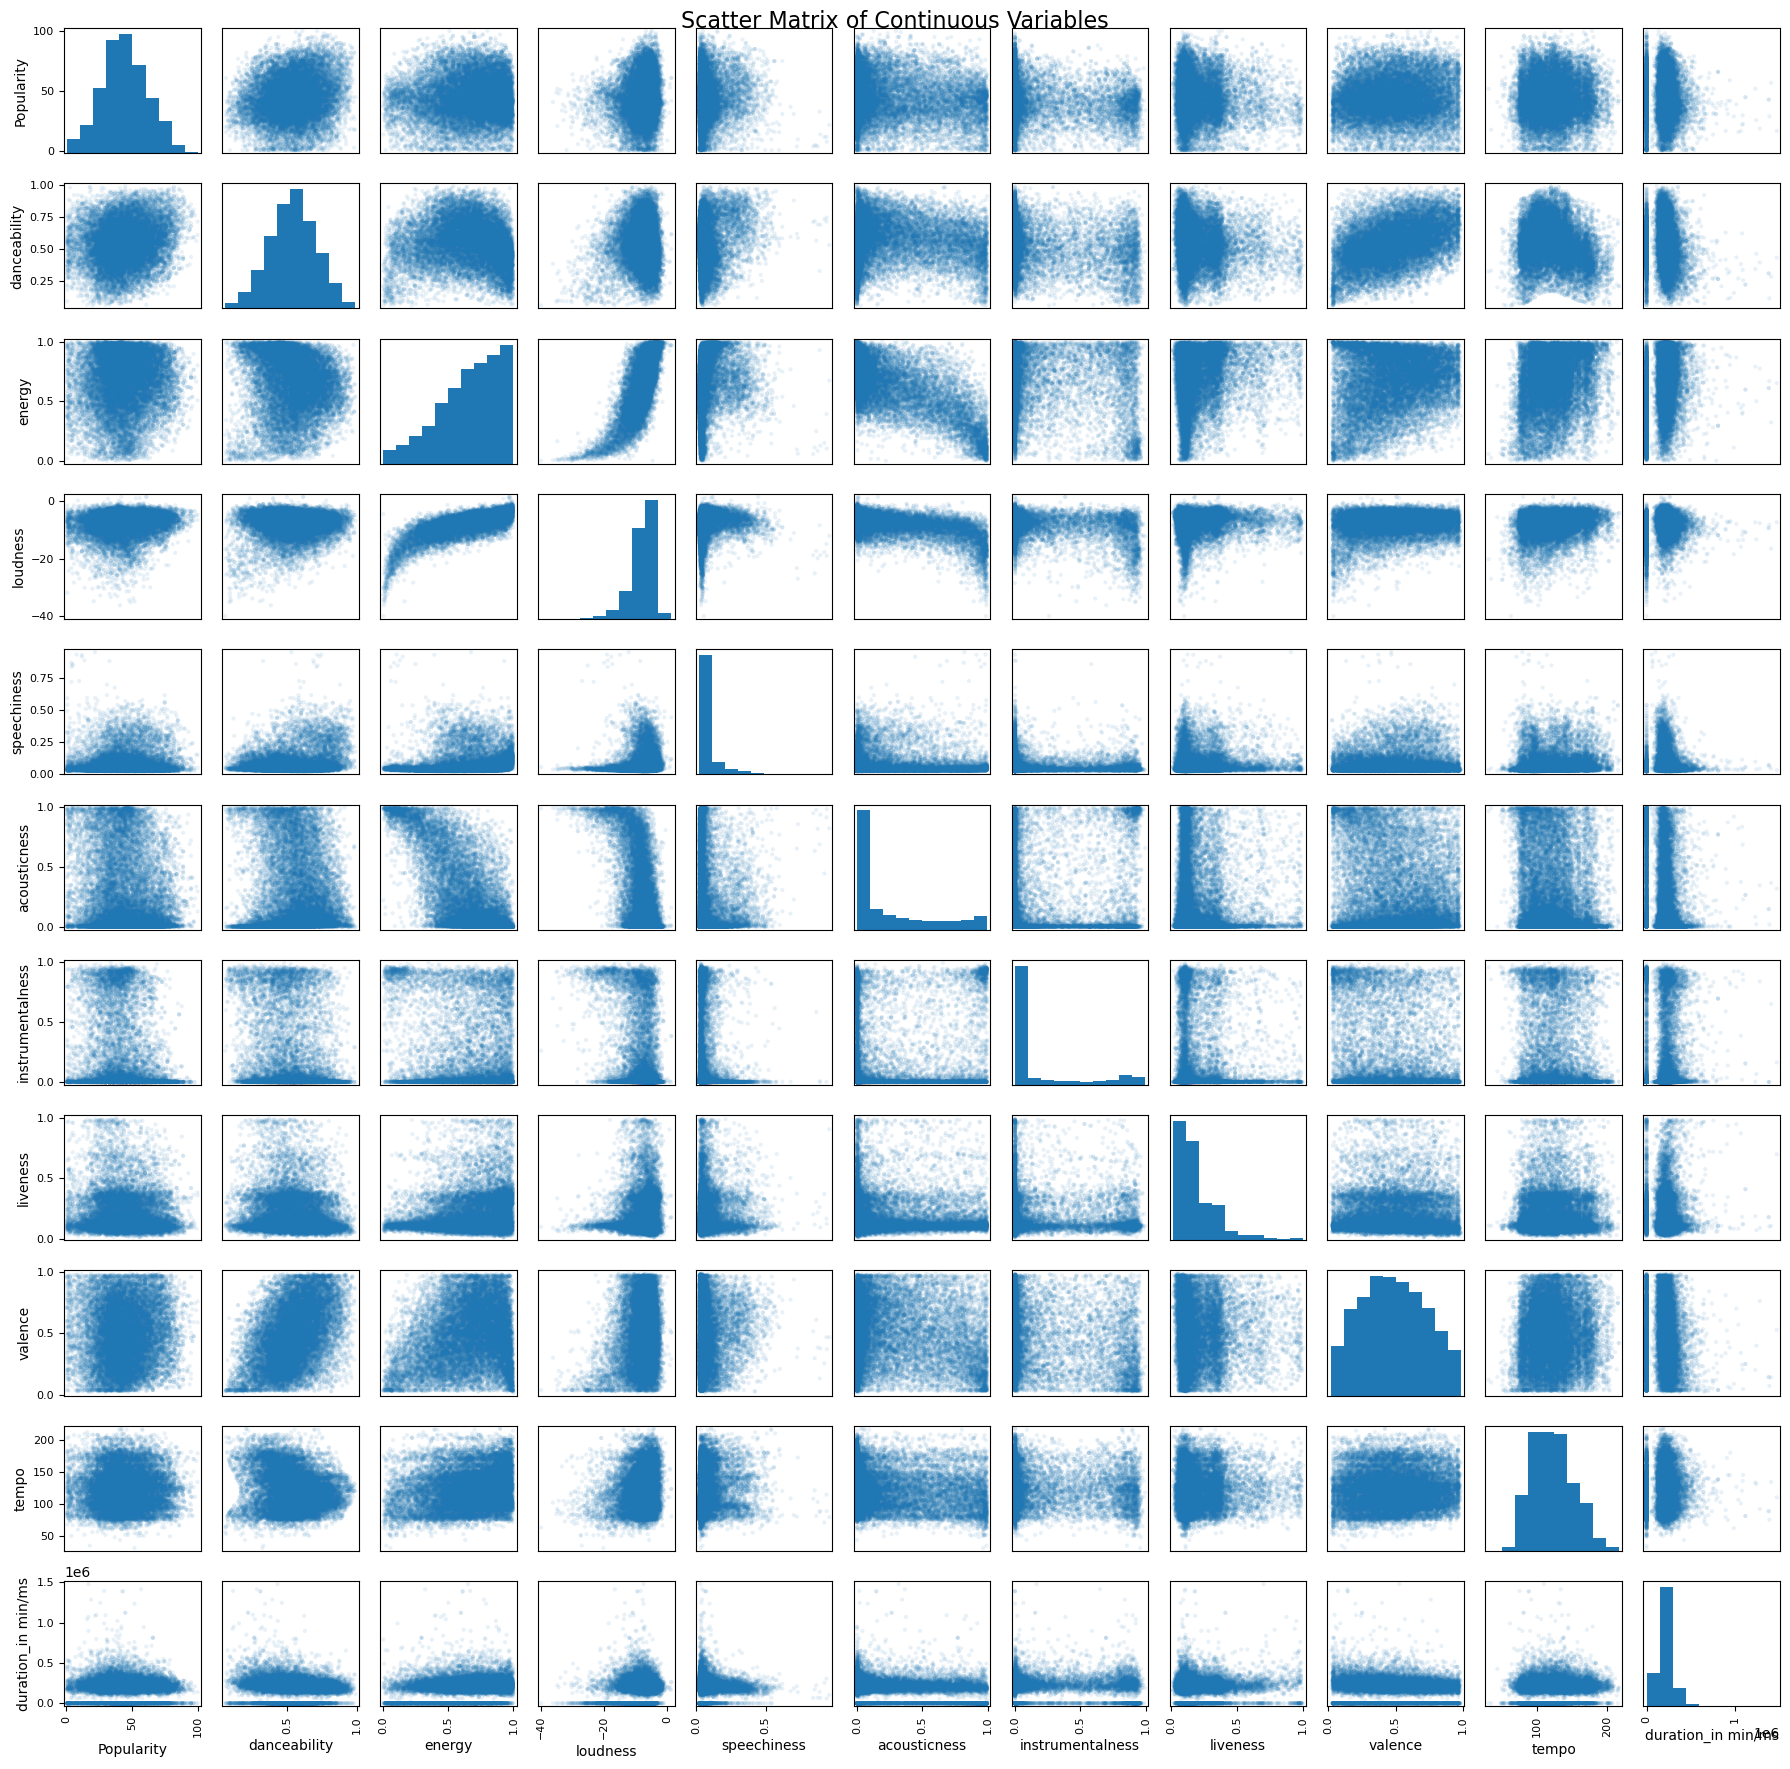

In [20]:
#more EDAs on relationships between features
#continuous vs continuous
from pandas.plotting import scatter_matrix
vars_cont = ["Popularity", "danceability", "energy", "loudness", "speechiness", 
             "acousticness", "instrumentalness", "liveness", "valence", 
             "tempo", "duration_in min/ms"]
scatter_matrix(df[vars_cont], figsize=(18, 18), alpha=0.1)
plt.suptitle('Scatter Matrix of Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()

(I also wrote codes for the individual scatterplots:)
import itertools

vars_cont = ["Popularity", "danceability", "energy", "loudness", "speechiness", 
             "acousticness", "instrumentalness", "liveness", "valence", 
             "tempo", "duration_in min/ms"]

pairs = itertools.combinations(vars_cont, 2)

for (i, k) in pairs:

    df.plot.scatter(i, k, figsize=(5, 3), alpha=0.1)

    plt.title(f"{k} vs {i}")

    plt.show()

It seems like there's a positive correlation between loudness and energy, between valence and danceability, and a negative correlation between acousticness and energy. 
I will dive deeper later using correlation matrix as well as f_classif when Class is involved.

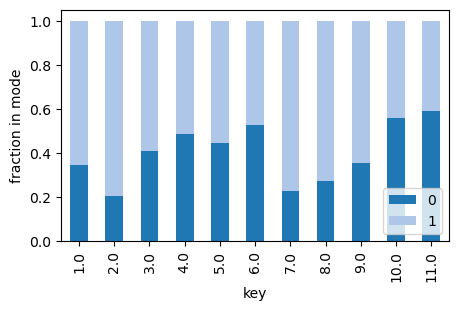

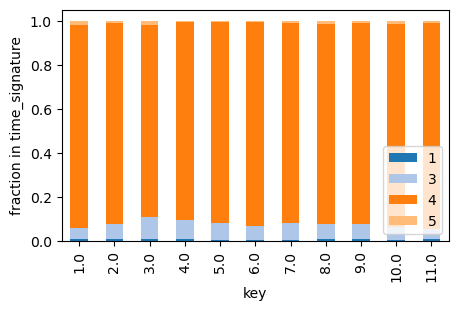

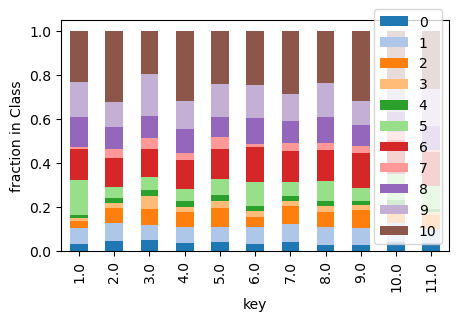

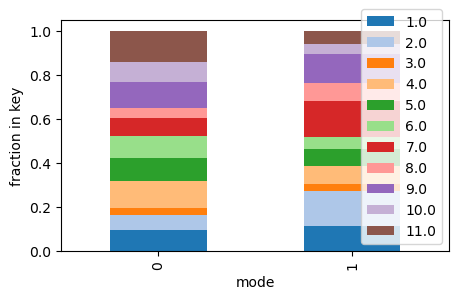

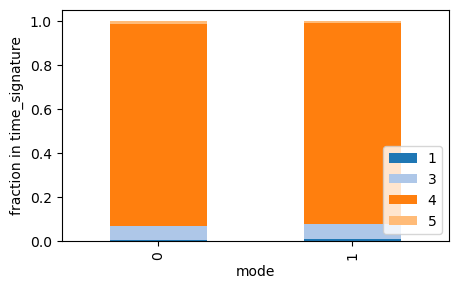

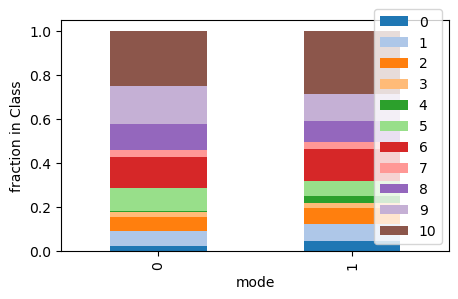

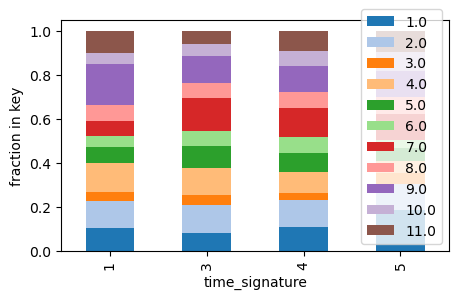

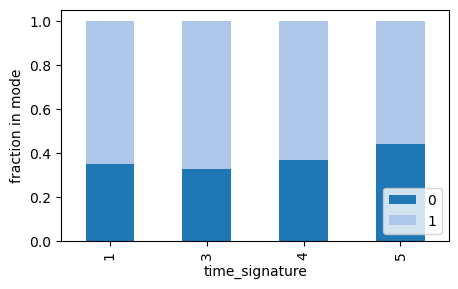

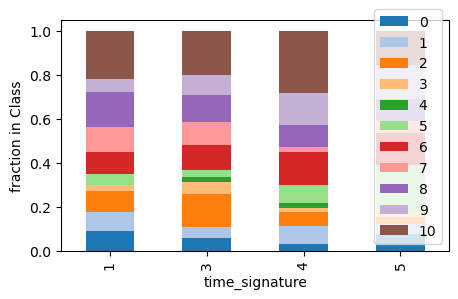

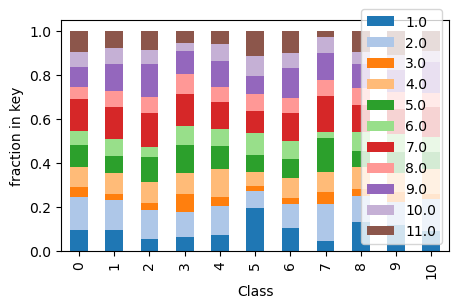

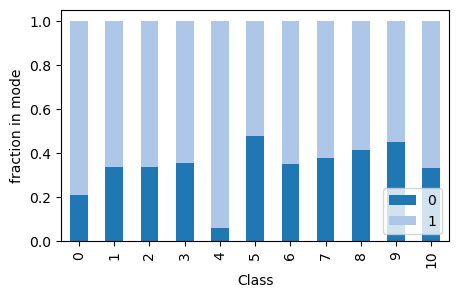

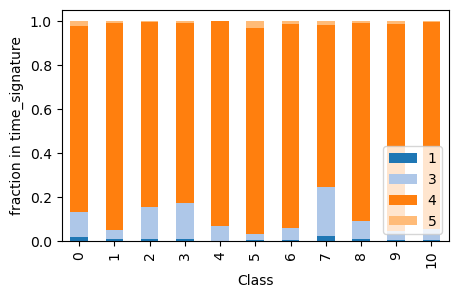

In [9]:
#categorical vs categorical 
vars_cat = ["key","mode","time_signature","Class"]
num_colors = max(len(df[col].unique()) for col in vars_cat)
colors = plt.cm.tab20(range(num_colors))
for i in ["key","mode","time_signature","Class"]:   
    for k in ["key","mode","time_signature","Class"]:
        if i != k:
            count_matrix = df.groupby([i, k]).size().unstack()
            count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
            count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5, 3), color=colors)
            plt.ylabel(f"fraction in {k}")
            plt.legend(loc=4)
            plt.show()

From fraction in mode vs class graph, we could find that the songs in country music(4) is disproportionally(more than 90%) written in mode1, which refers to a major key. Similarly, acoustic/folk music songs are around 80% written in a major key.

<Figure size 800x500 with 0 Axes>

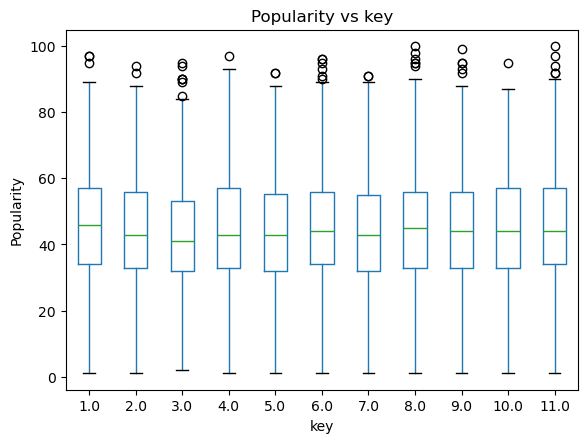

<Figure size 800x500 with 0 Axes>

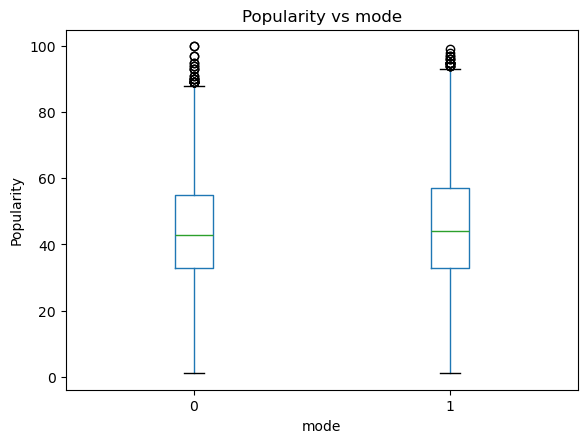

<Figure size 800x500 with 0 Axes>

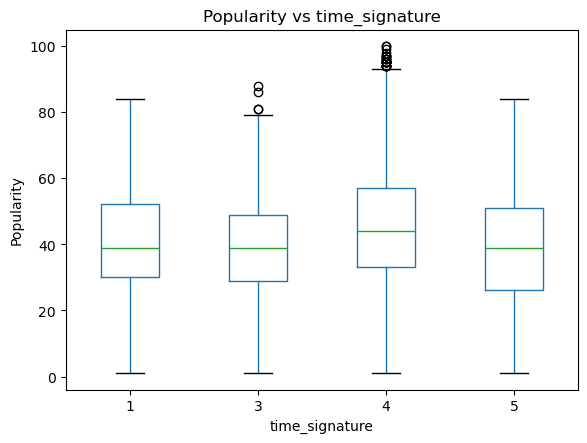

<Figure size 800x500 with 0 Axes>

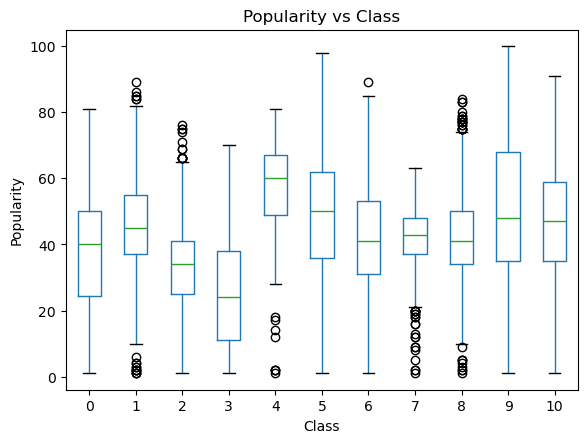

<Figure size 800x500 with 0 Axes>

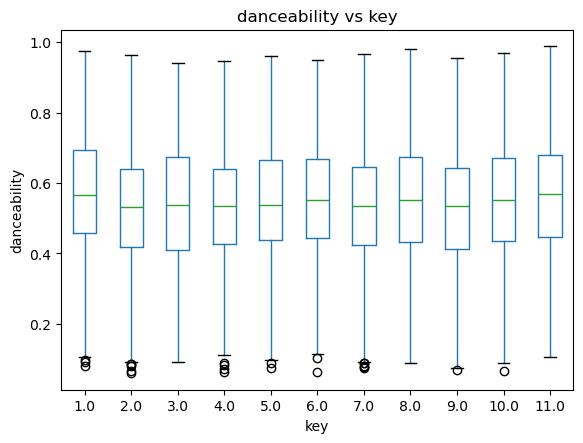

<Figure size 800x500 with 0 Axes>

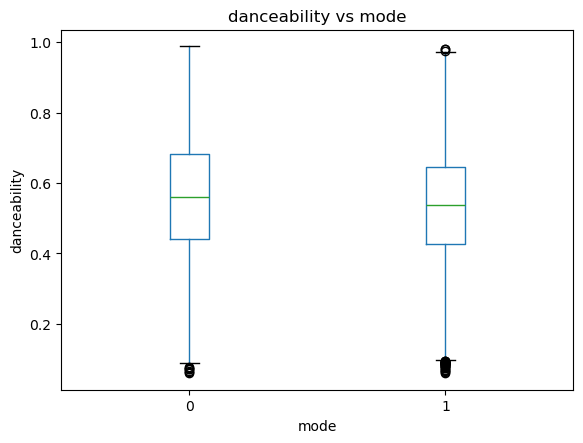

<Figure size 800x500 with 0 Axes>

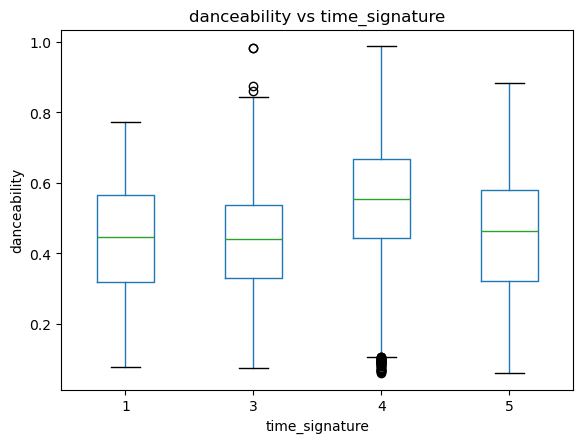

<Figure size 800x500 with 0 Axes>

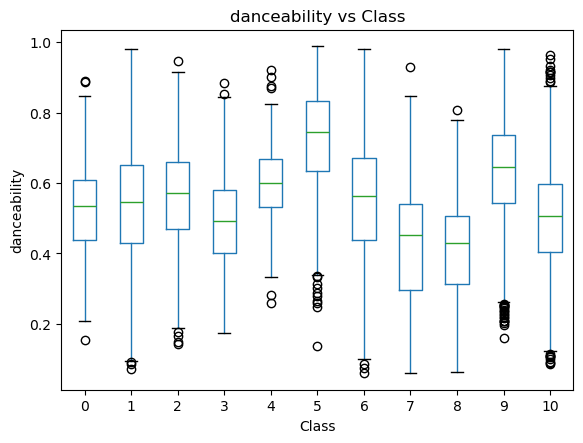

<Figure size 800x500 with 0 Axes>

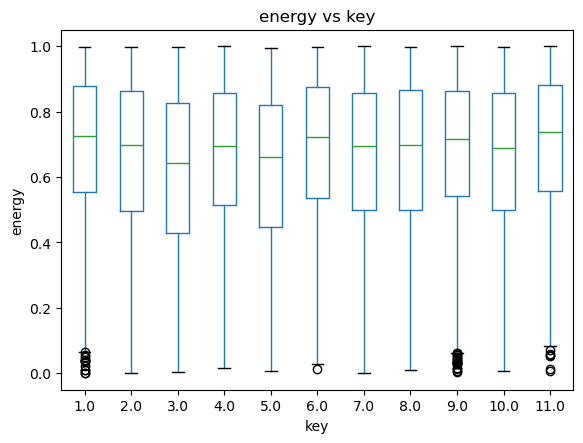

<Figure size 800x500 with 0 Axes>

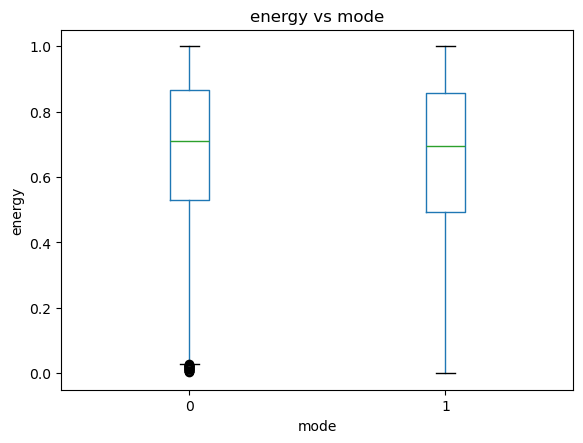

<Figure size 800x500 with 0 Axes>

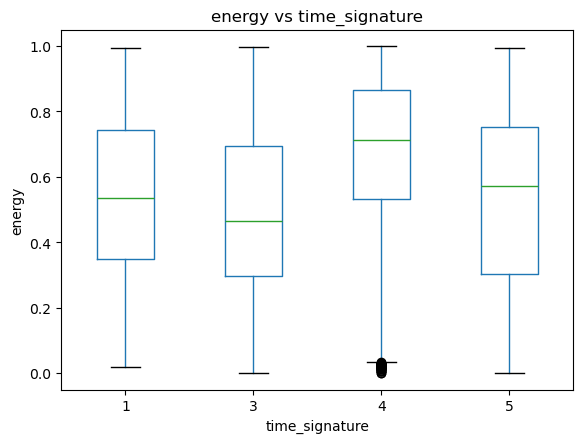

<Figure size 800x500 with 0 Axes>

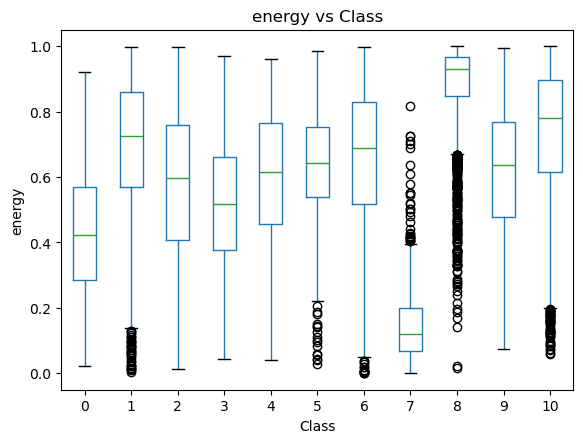

<Figure size 800x500 with 0 Axes>

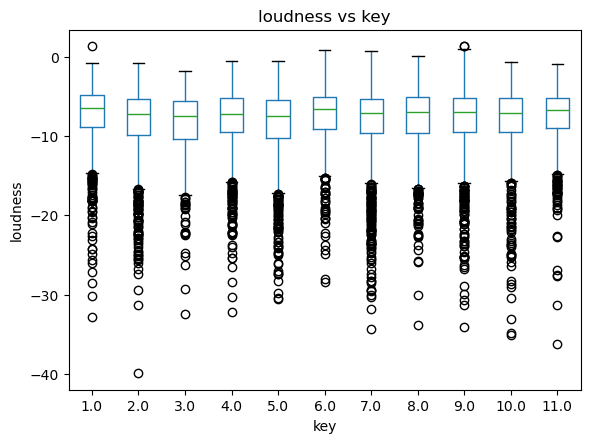

<Figure size 800x500 with 0 Axes>

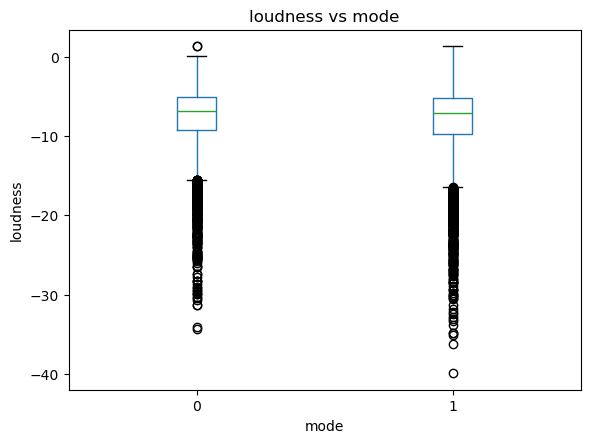

<Figure size 800x500 with 0 Axes>

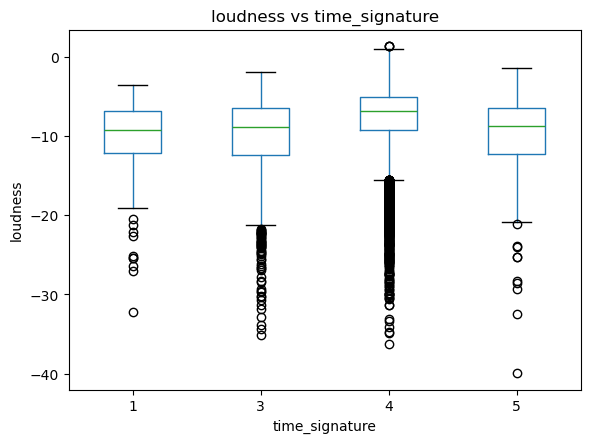

<Figure size 800x500 with 0 Axes>

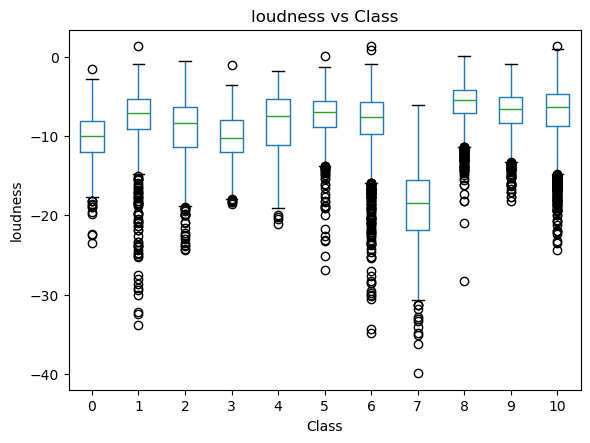

<Figure size 800x500 with 0 Axes>

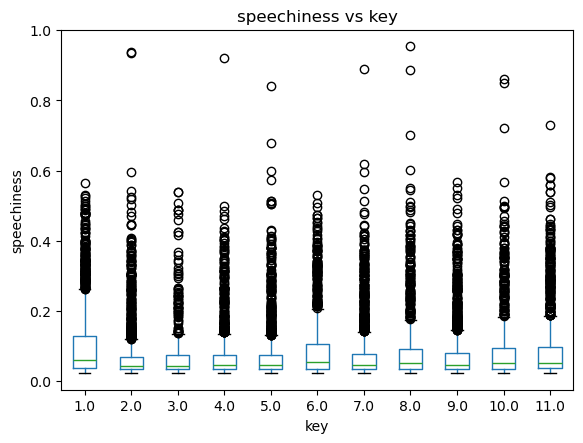

<Figure size 800x500 with 0 Axes>

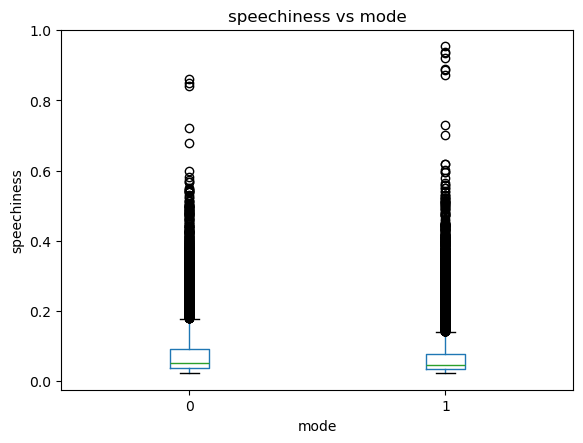

<Figure size 800x500 with 0 Axes>

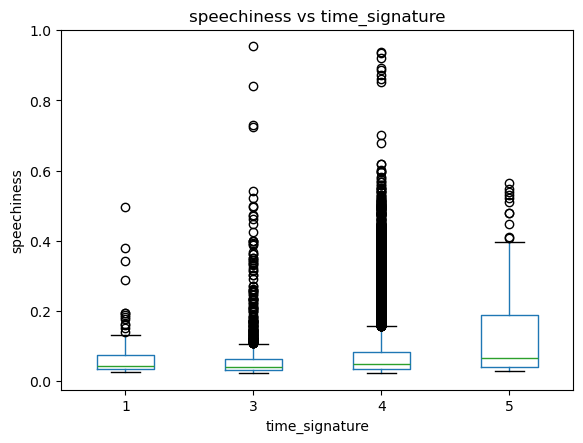

<Figure size 800x500 with 0 Axes>

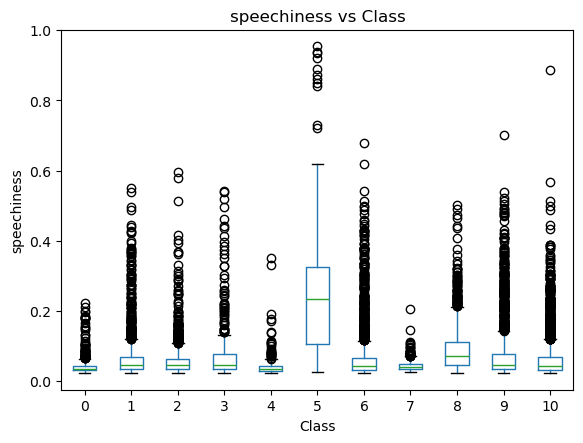

<Figure size 800x500 with 0 Axes>

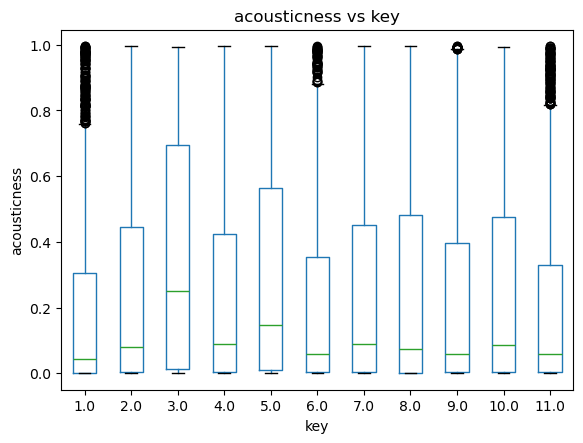

<Figure size 800x500 with 0 Axes>

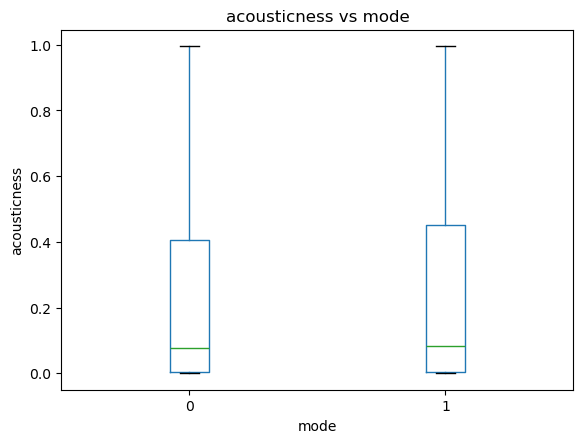

<Figure size 800x500 with 0 Axes>

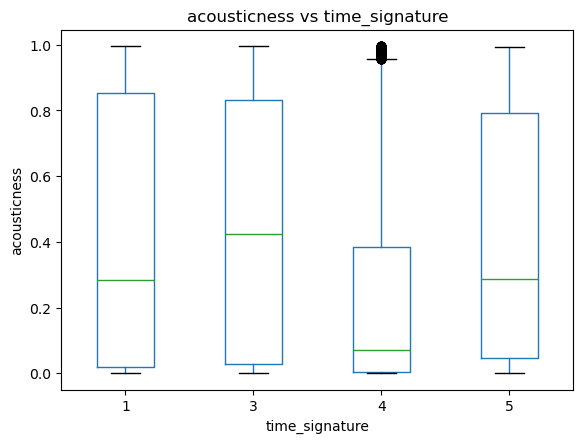

<Figure size 800x500 with 0 Axes>

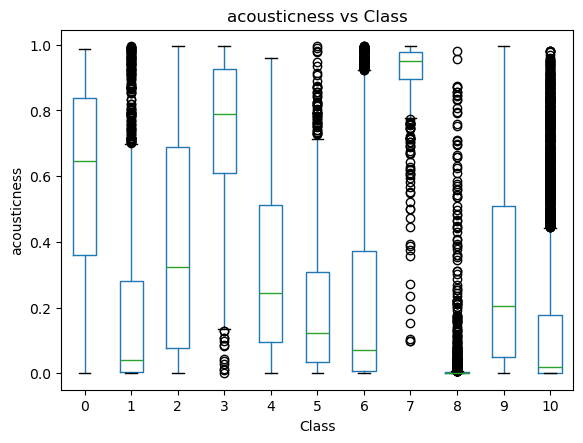

<Figure size 800x500 with 0 Axes>

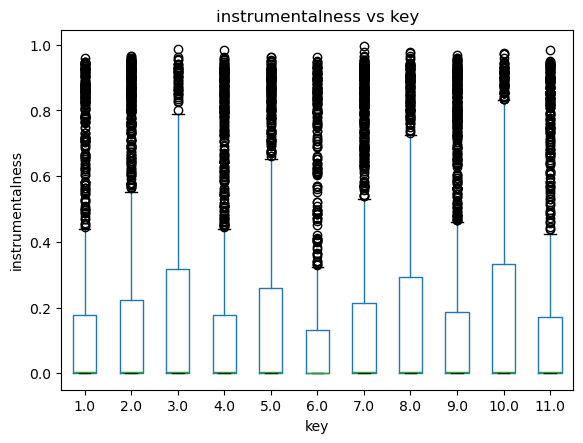

<Figure size 800x500 with 0 Axes>

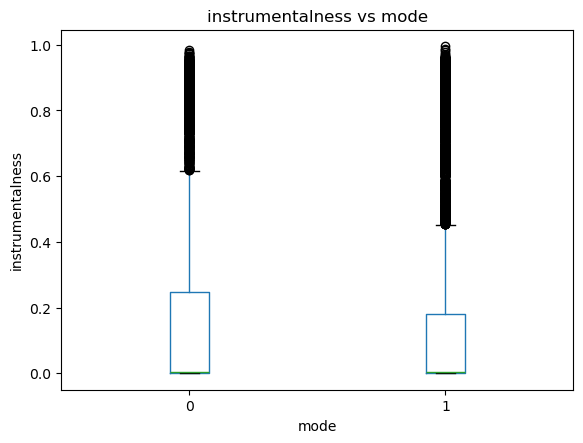

<Figure size 800x500 with 0 Axes>

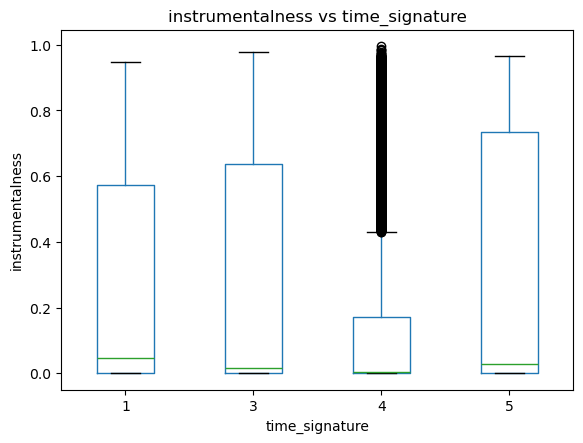

<Figure size 800x500 with 0 Axes>

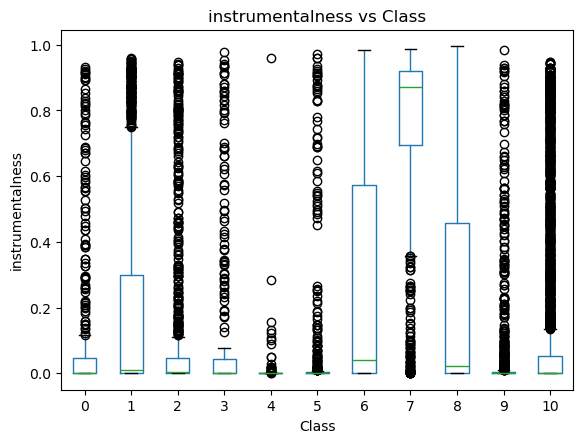

<Figure size 800x500 with 0 Axes>

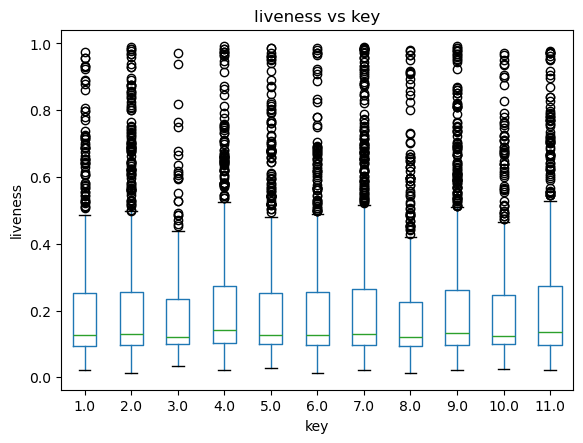

<Figure size 800x500 with 0 Axes>

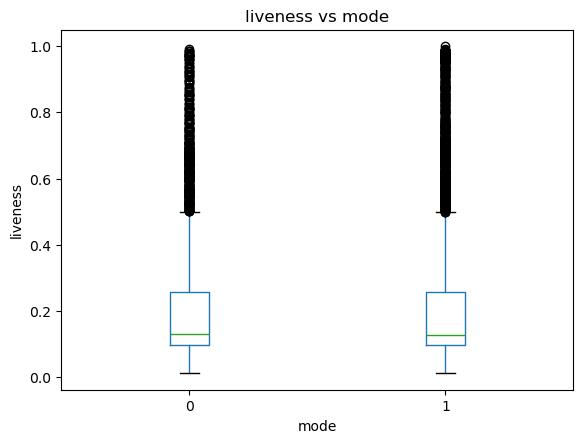

<Figure size 800x500 with 0 Axes>

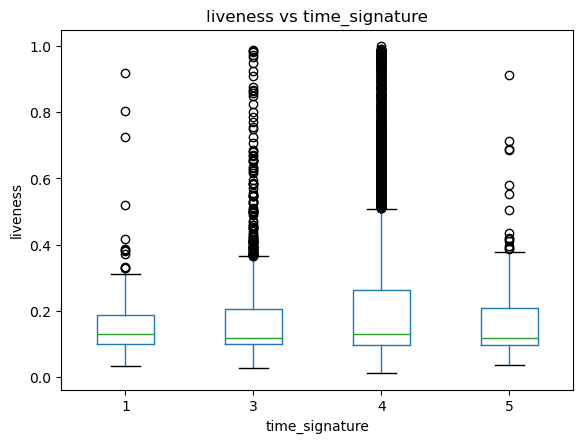

<Figure size 800x500 with 0 Axes>

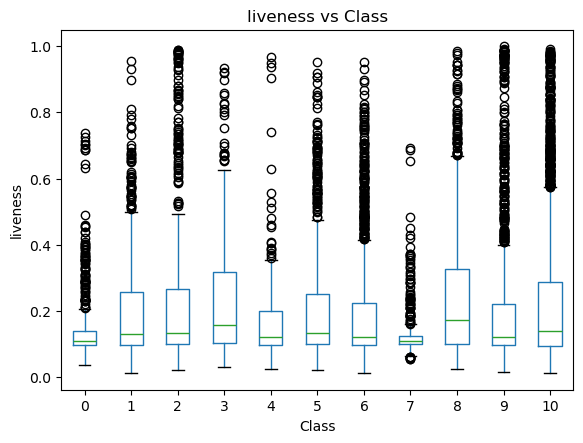

<Figure size 800x500 with 0 Axes>

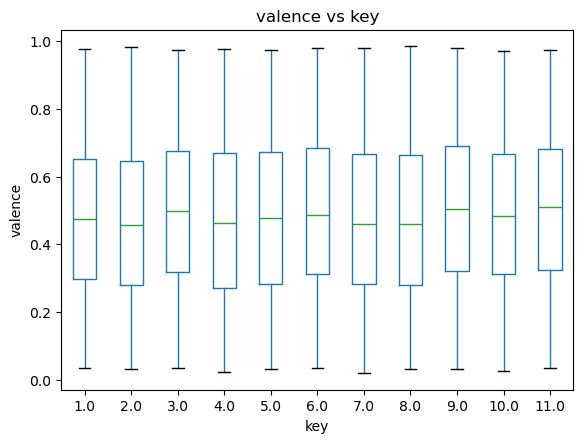

<Figure size 800x500 with 0 Axes>

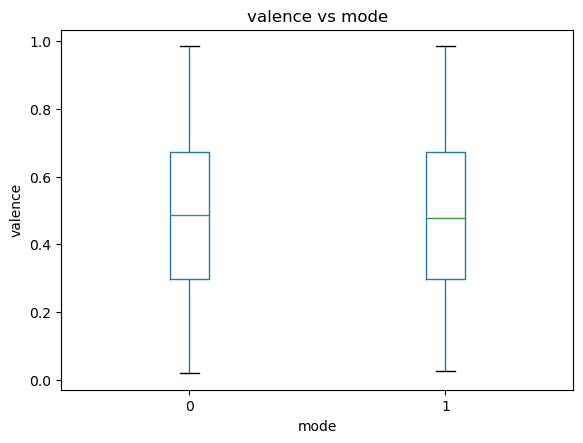

<Figure size 800x500 with 0 Axes>

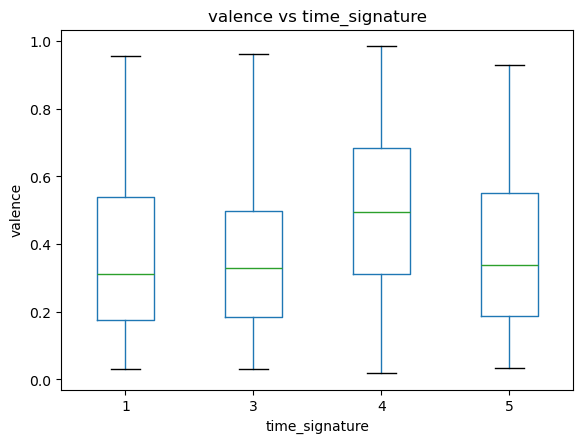

<Figure size 800x500 with 0 Axes>

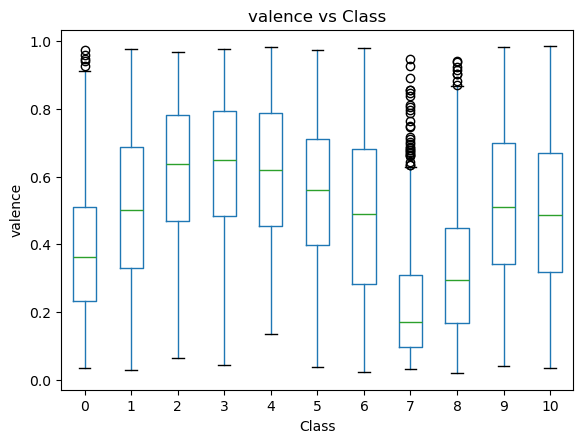

<Figure size 800x500 with 0 Axes>

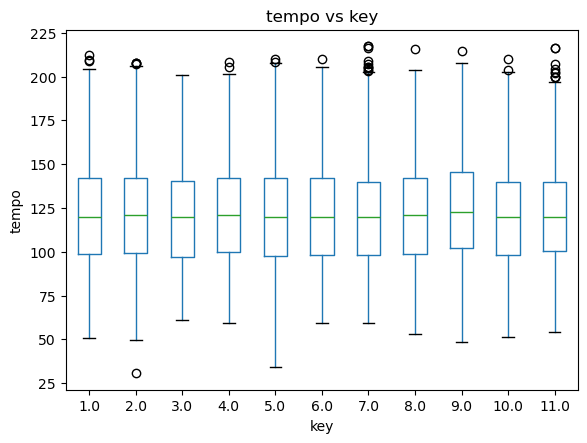

<Figure size 800x500 with 0 Axes>

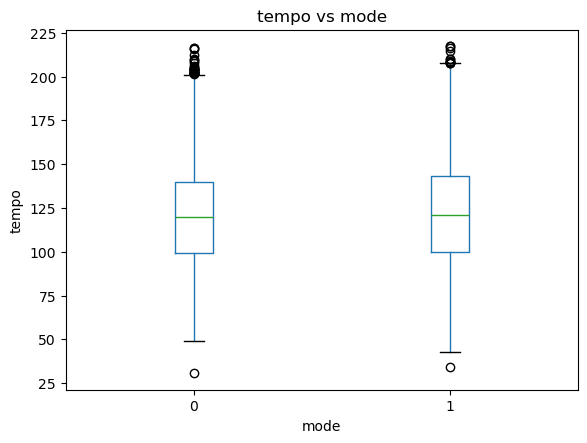

<Figure size 800x500 with 0 Axes>

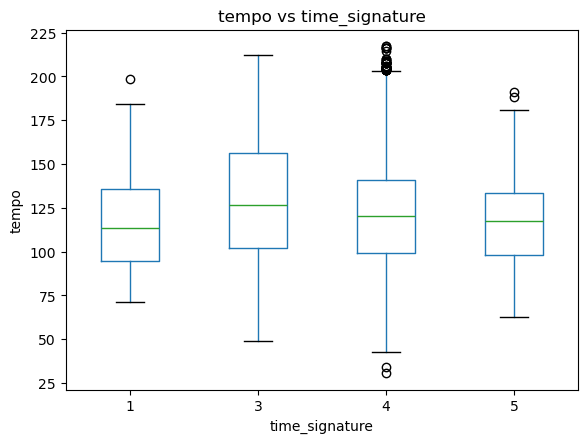

<Figure size 800x500 with 0 Axes>

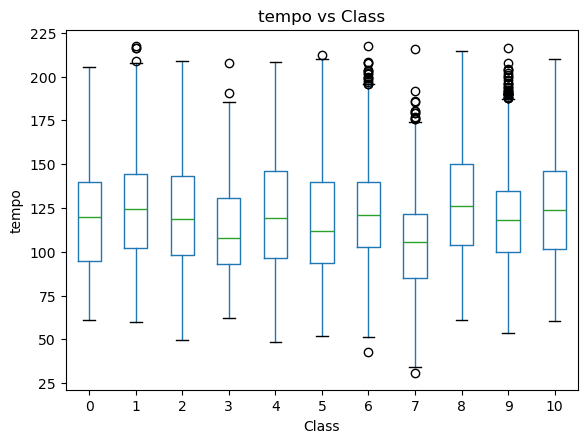

<Figure size 800x500 with 0 Axes>

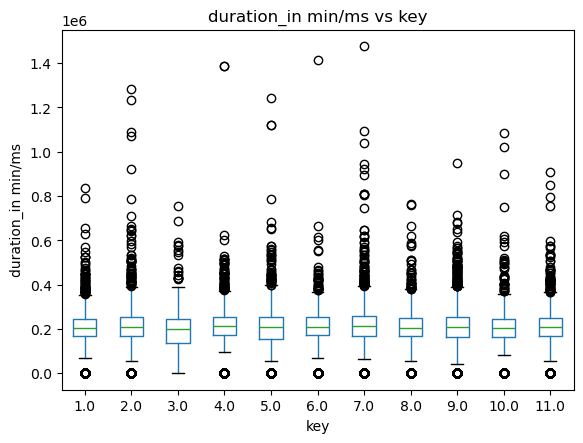

<Figure size 800x500 with 0 Axes>

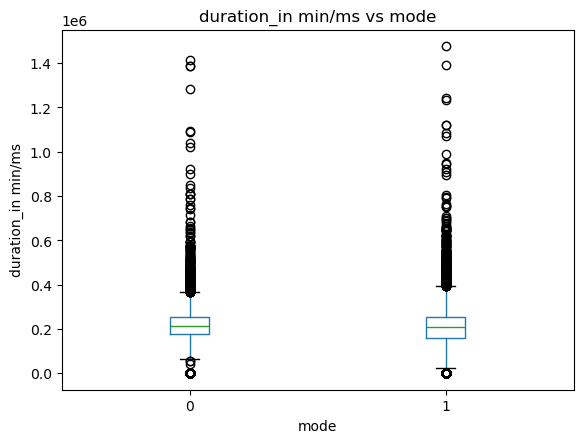

<Figure size 800x500 with 0 Axes>

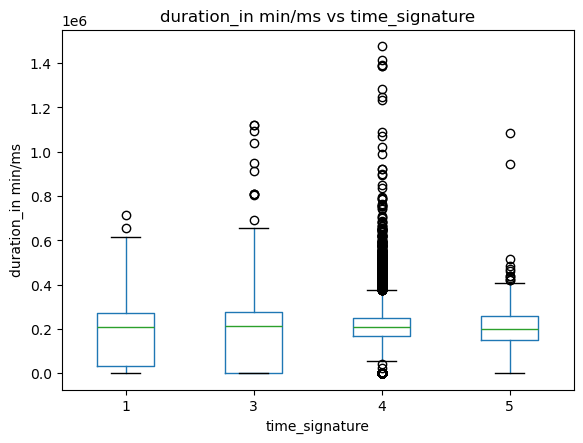

<Figure size 800x500 with 0 Axes>

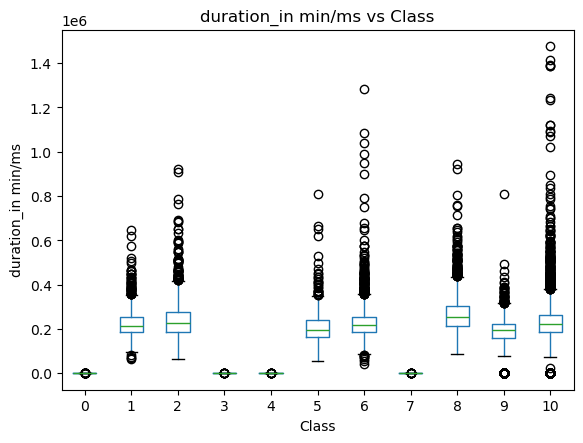

In [10]:
#continuous vs categorical
#box plots
for var_cont in vars_cont:
    for var_cat in vars_cat:
        plt.figure(figsize=(8, 5))
        df.boxplot(column=var_cont, by=var_cat, grid=False)
        plt.title(f"{var_cont} vs {var_cat}")
        plt.suptitle("") 
        plt.ylabel(var_cont)
        plt.xlabel(var_cat)
        plt.show()

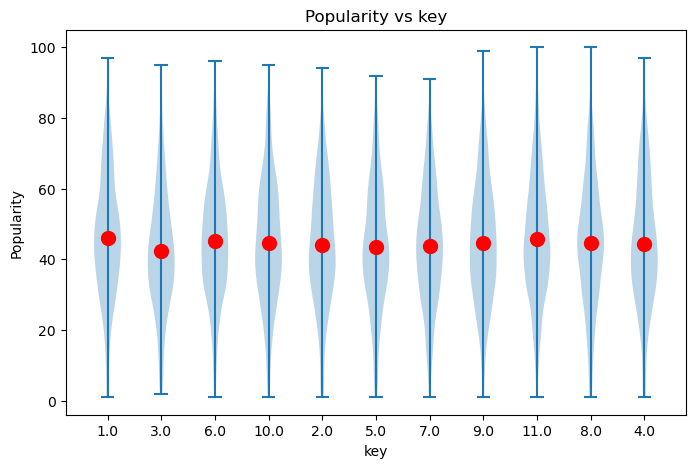

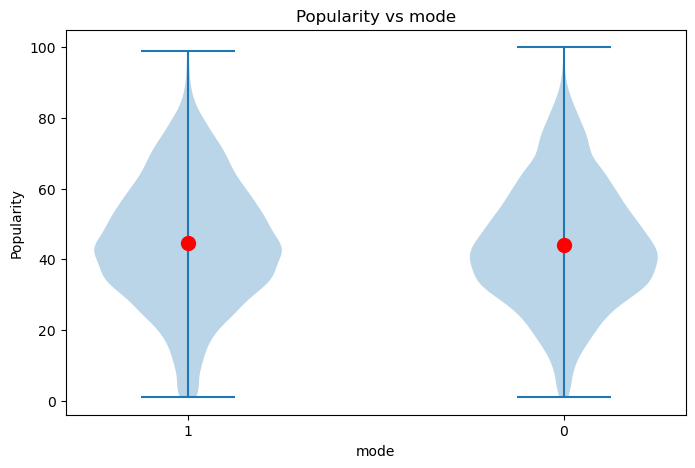

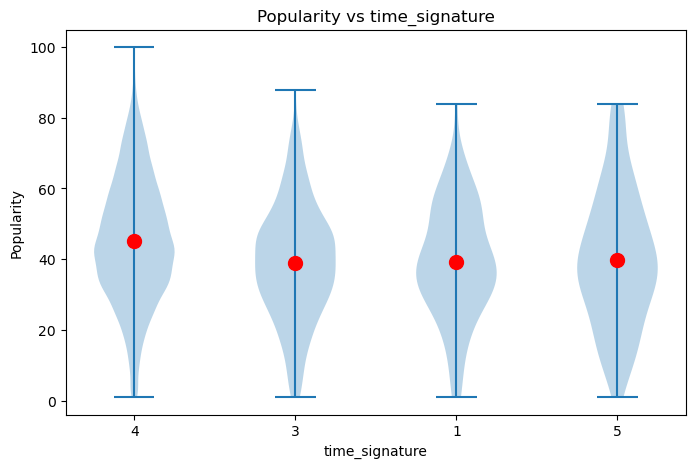

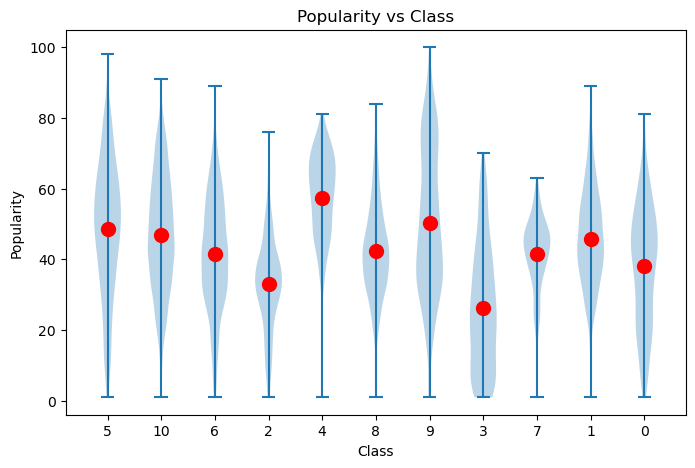

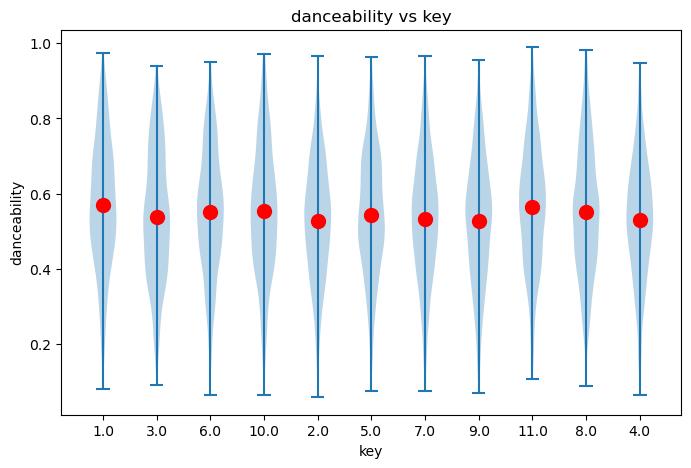

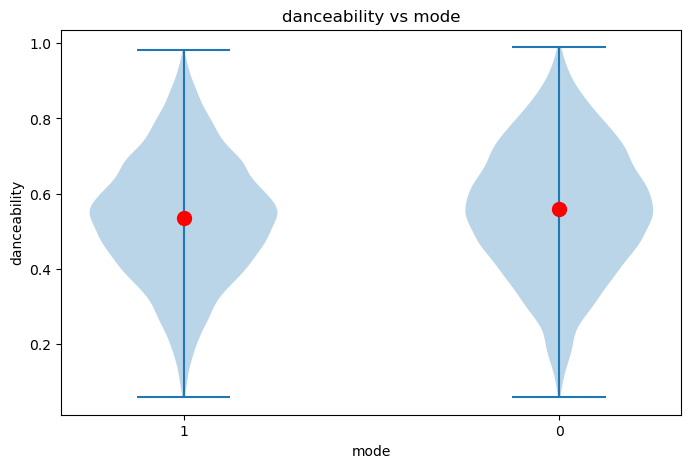

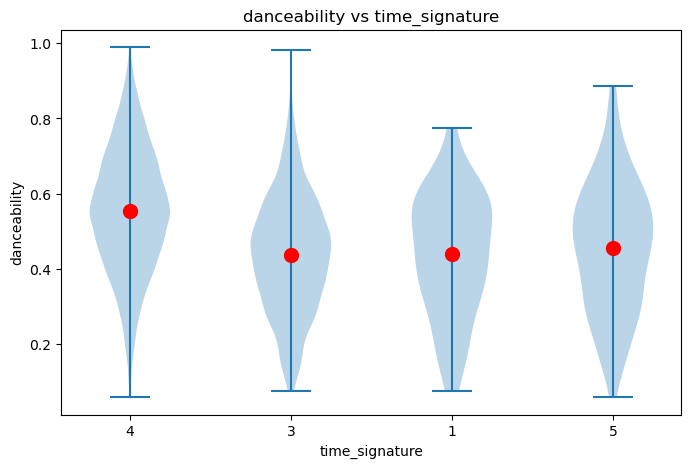

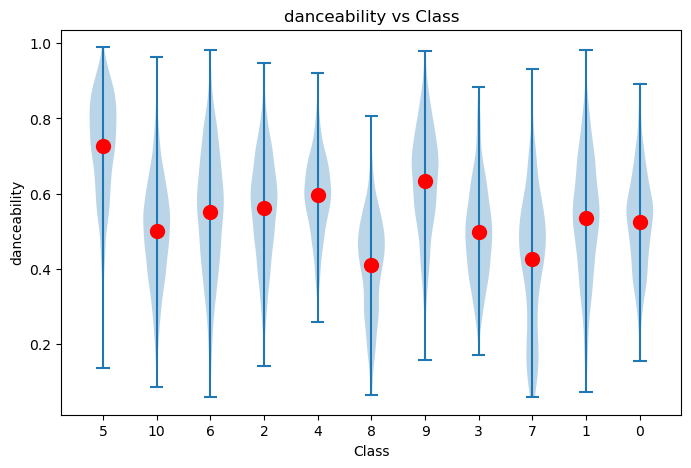

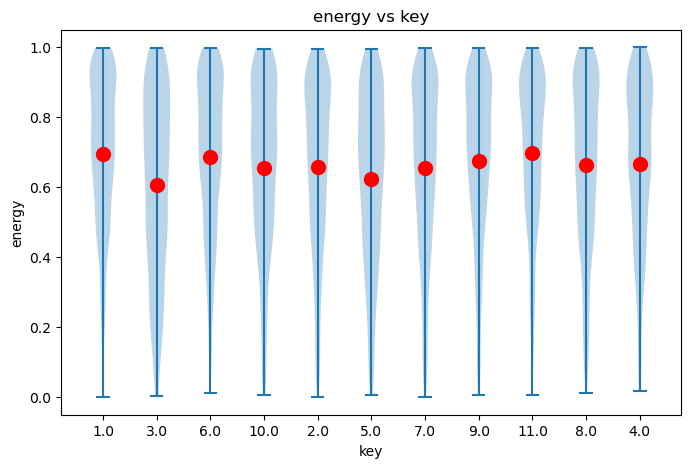

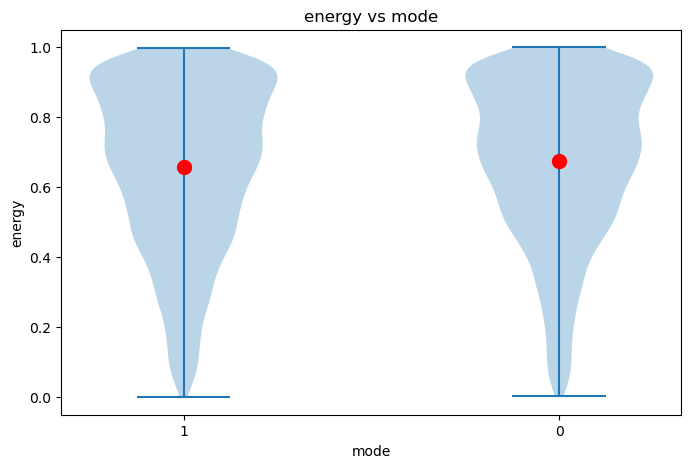

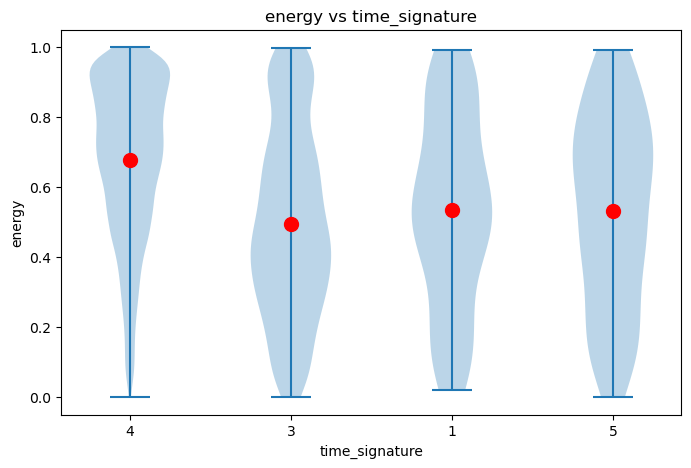

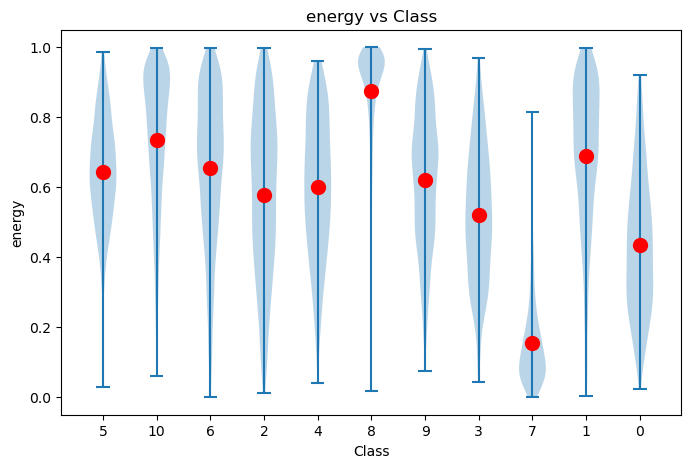

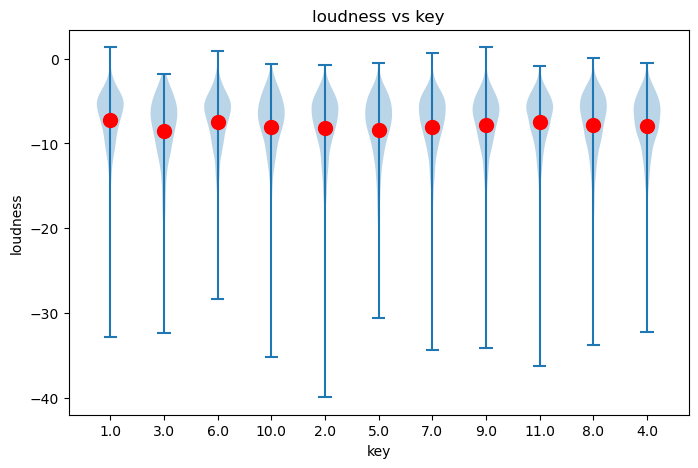

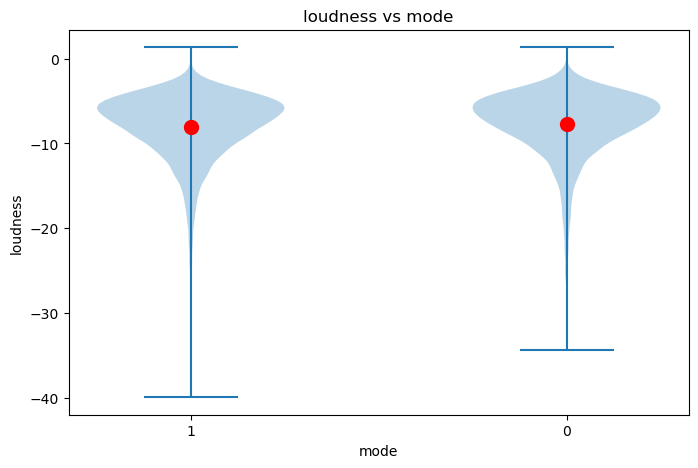

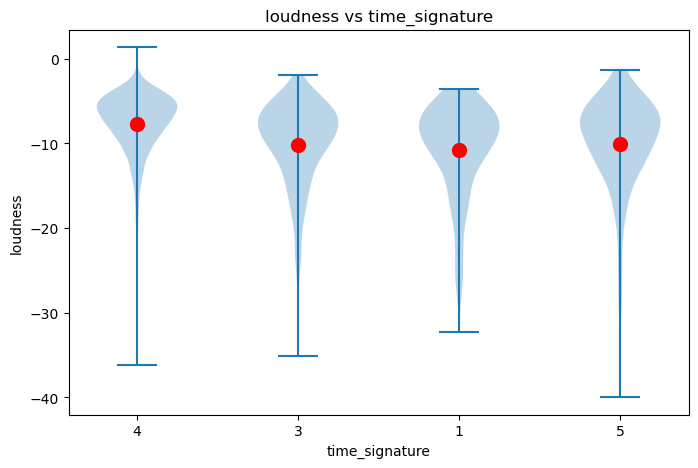

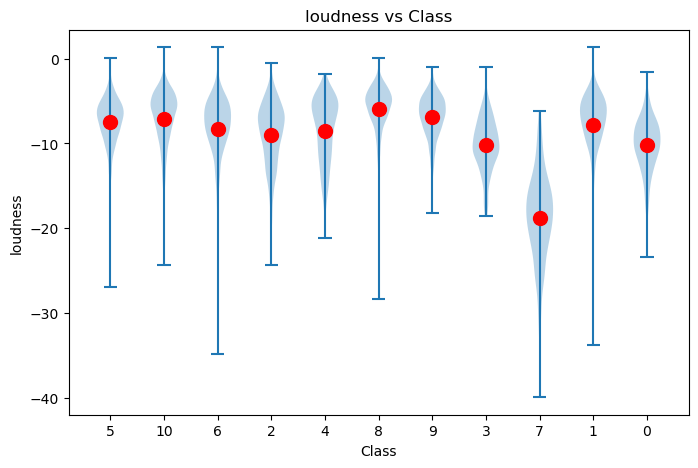

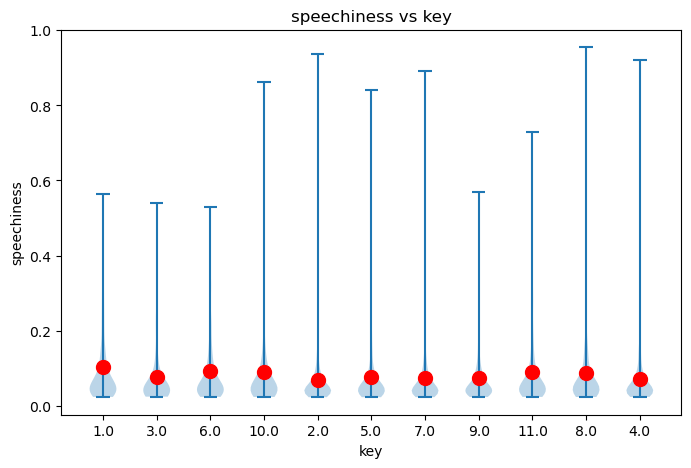

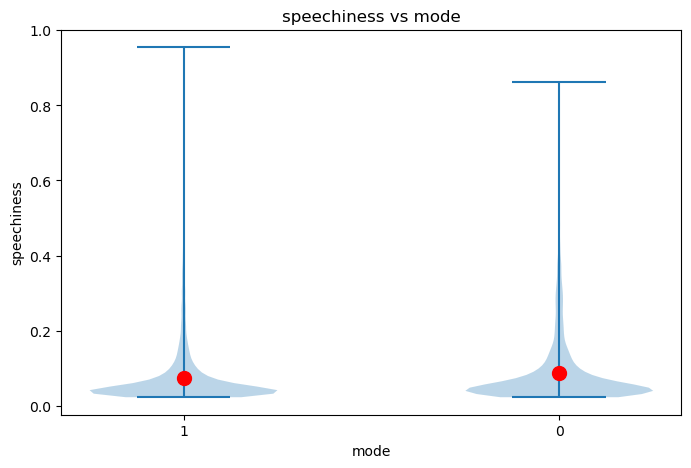

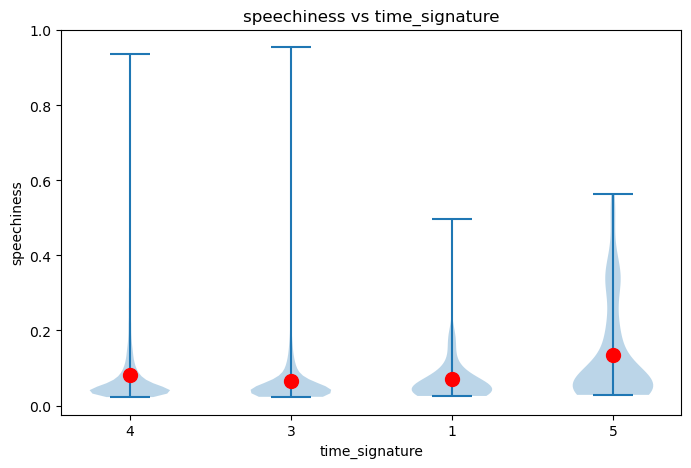

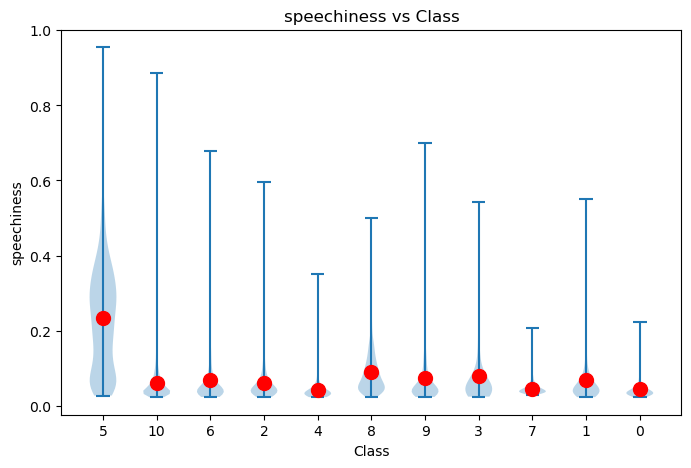

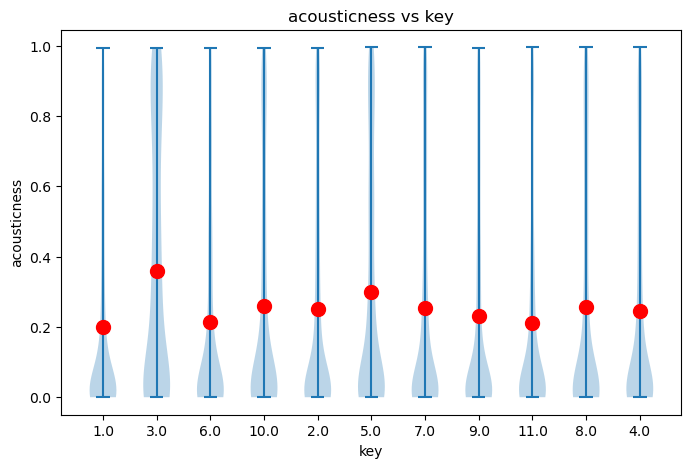

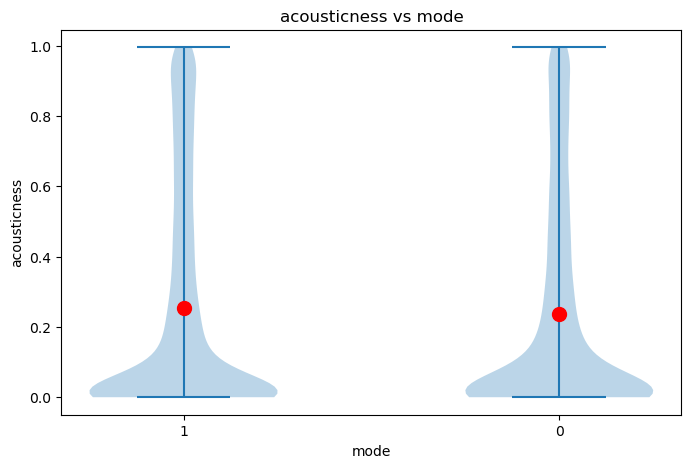

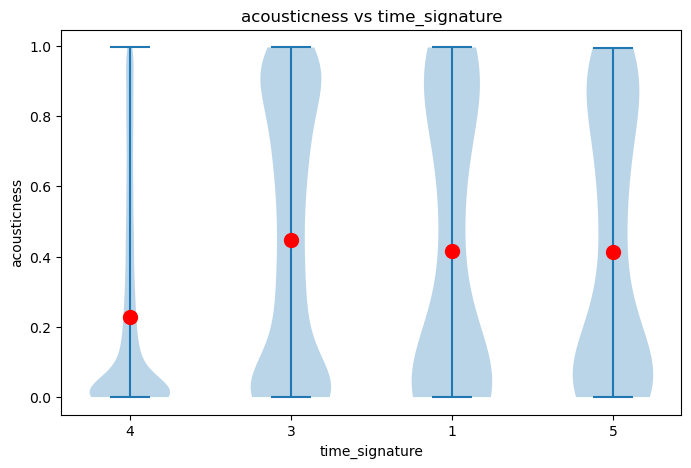

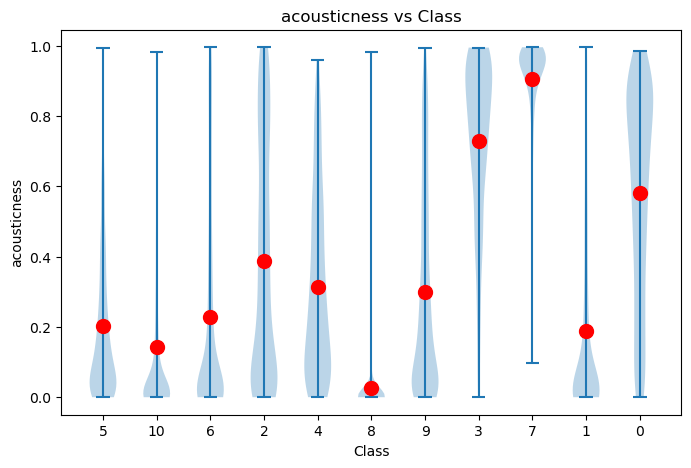

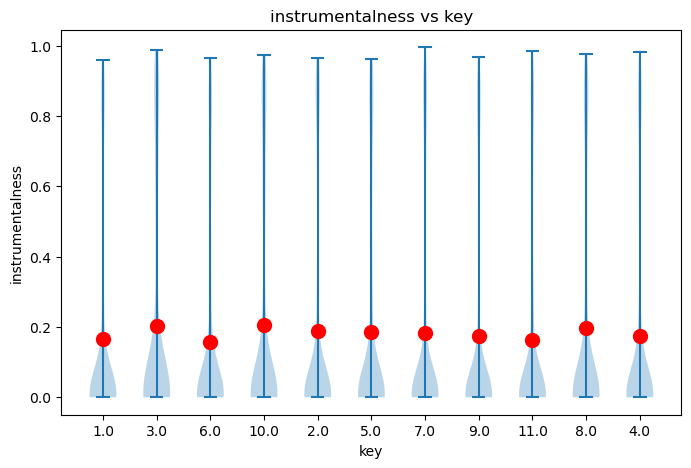

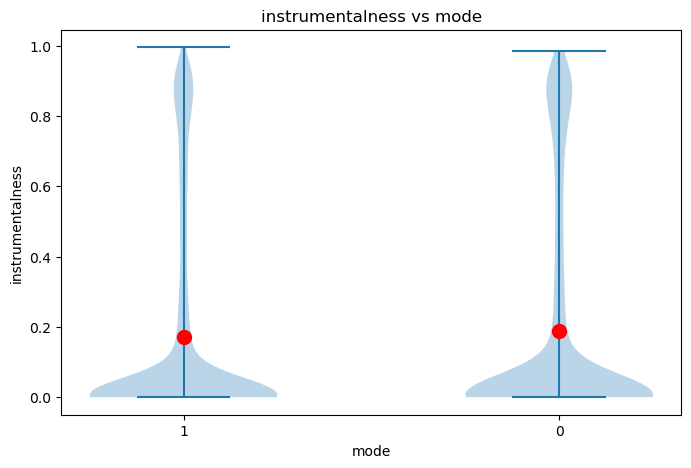

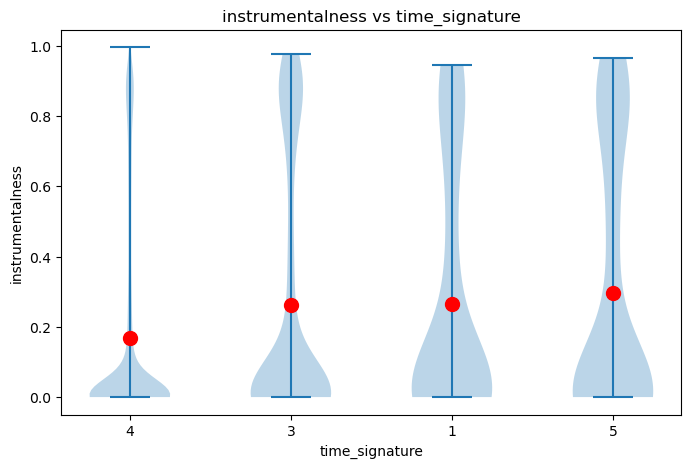

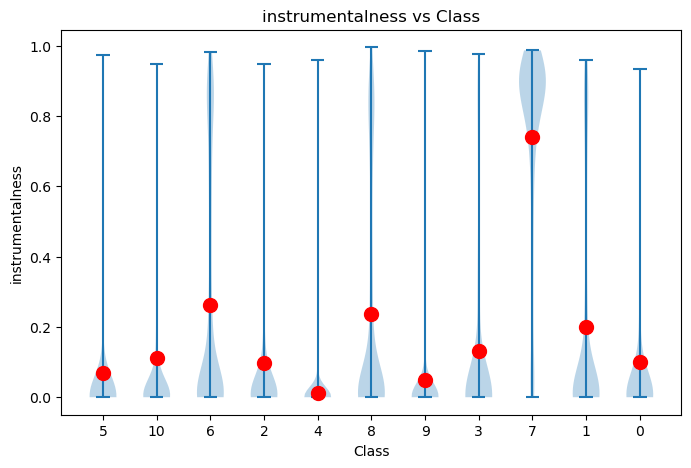

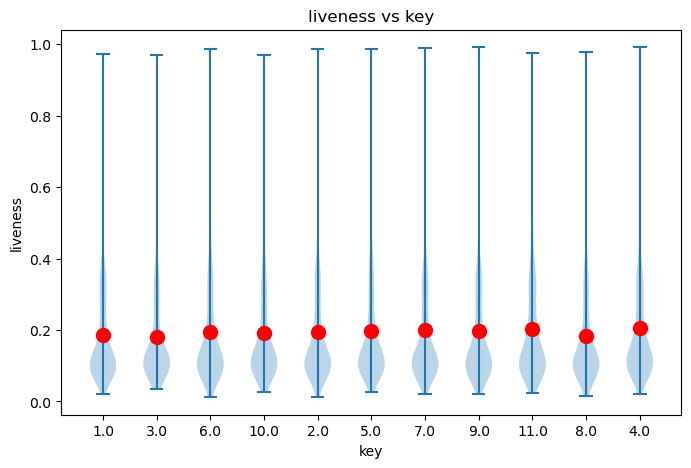

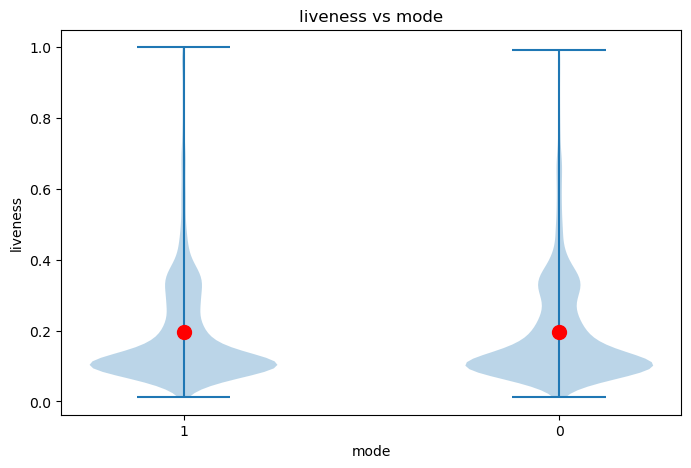

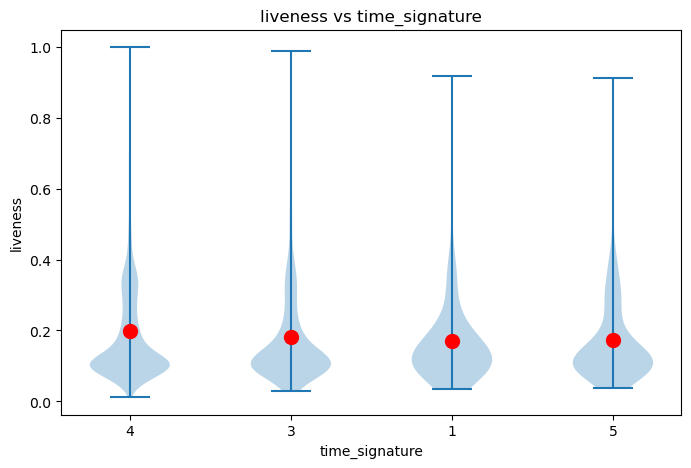

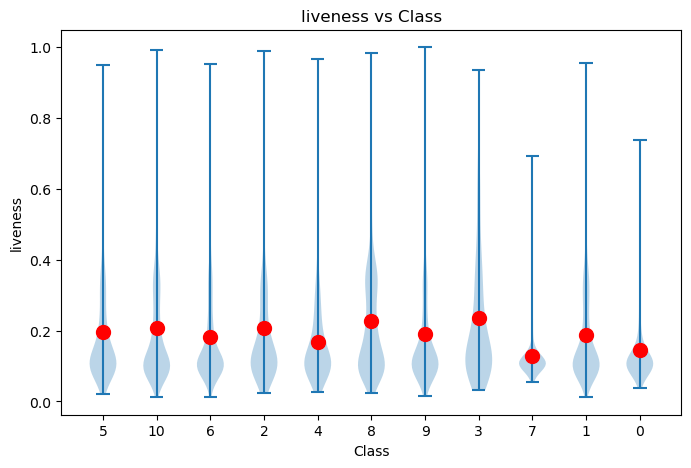

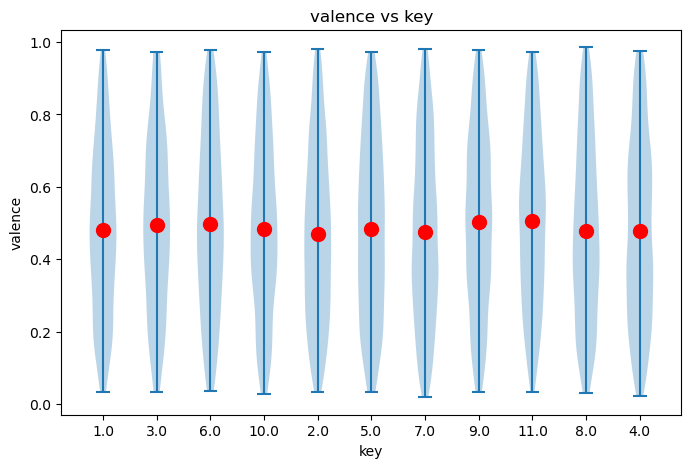

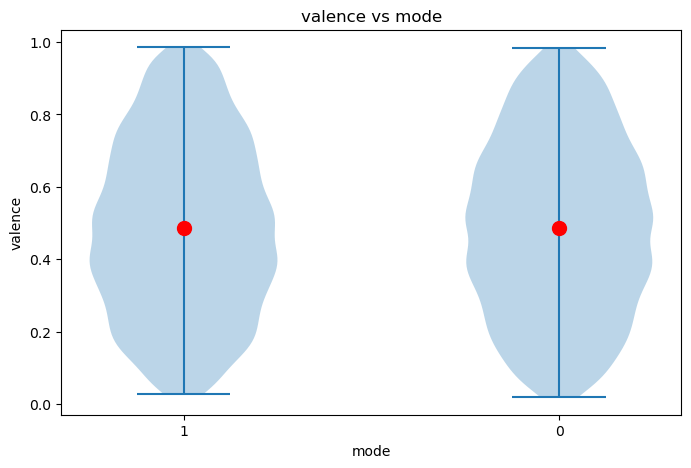

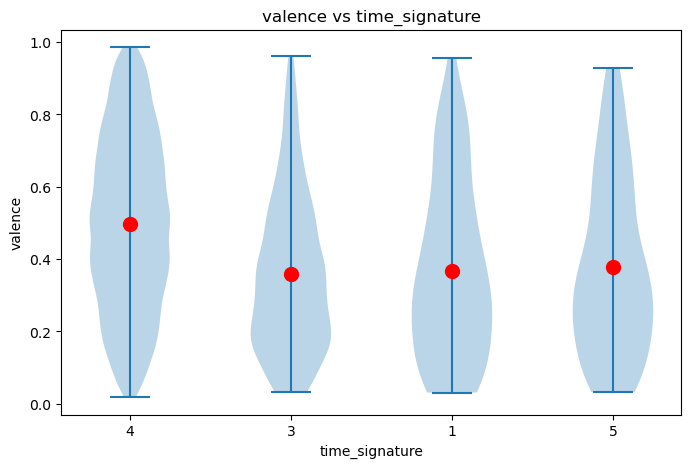

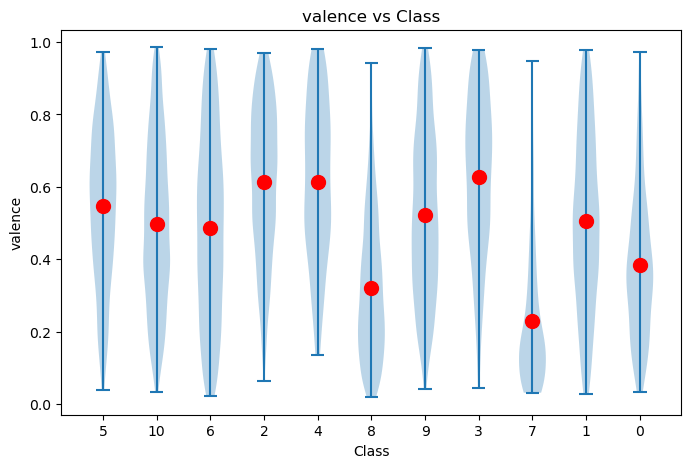

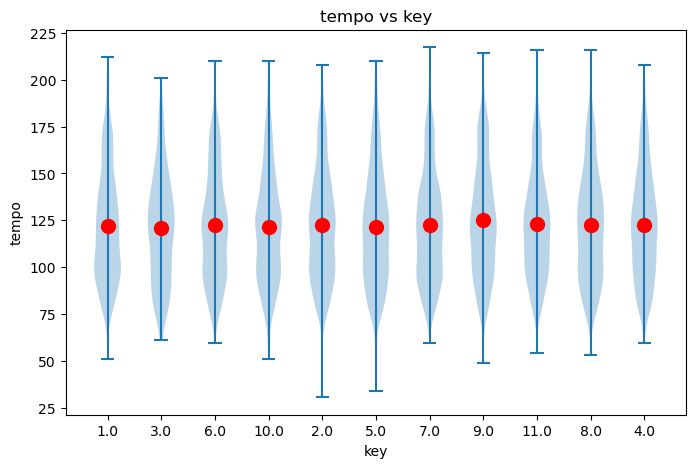

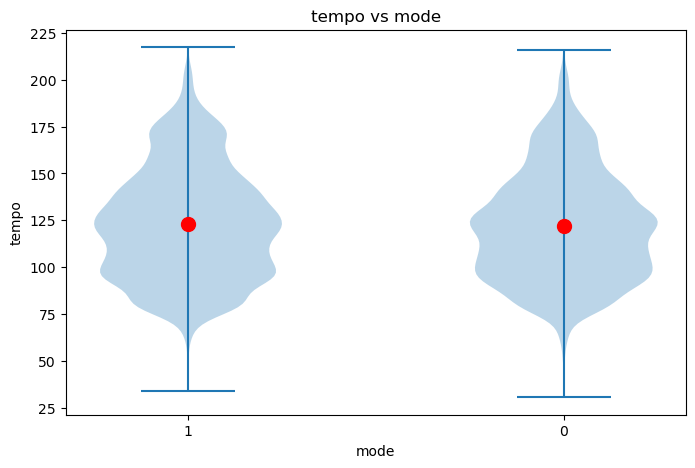

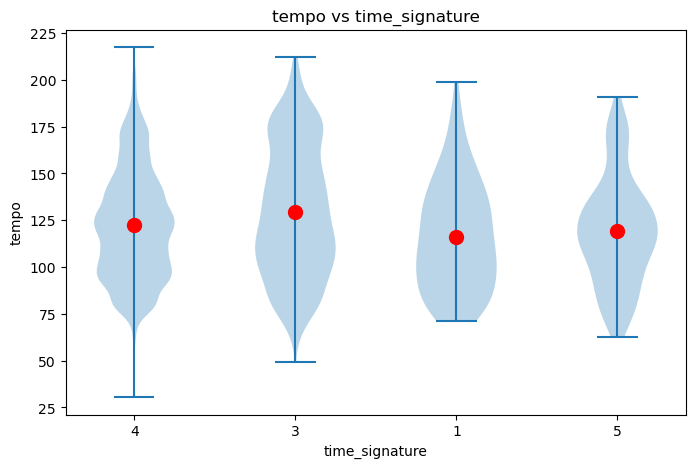

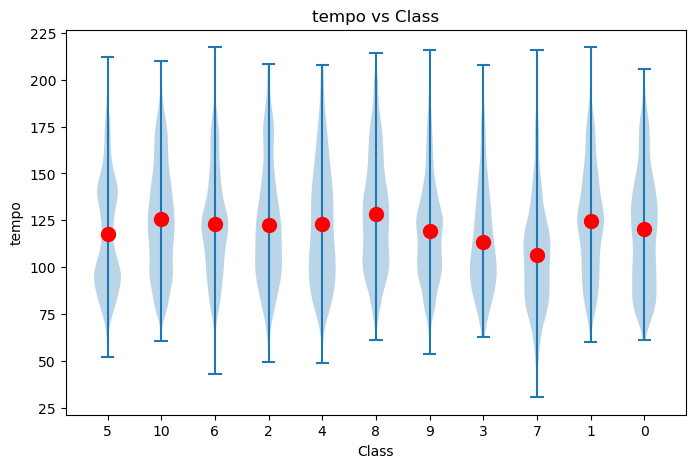

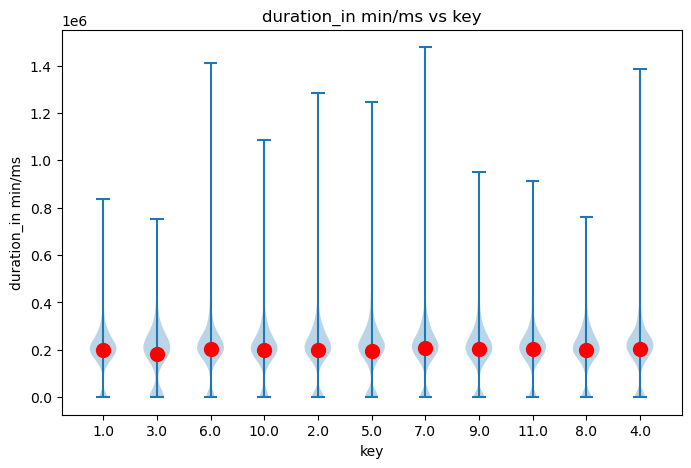

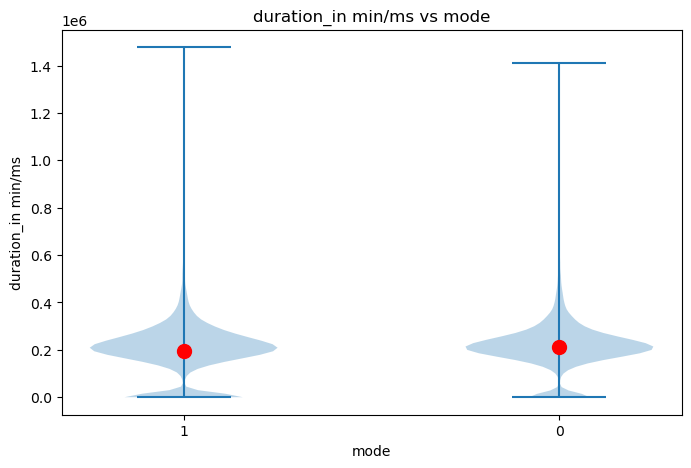

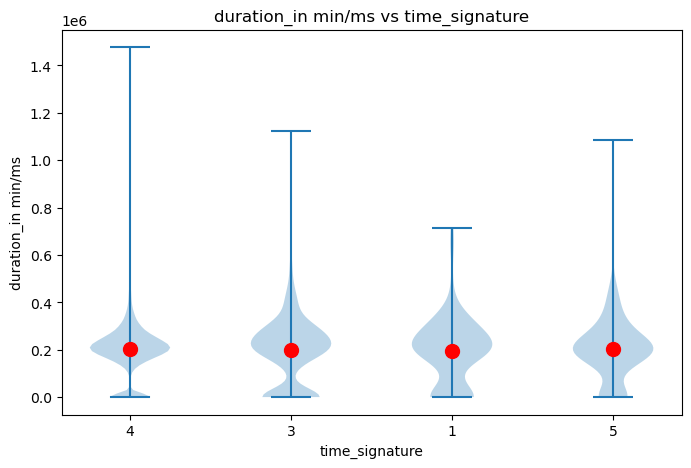

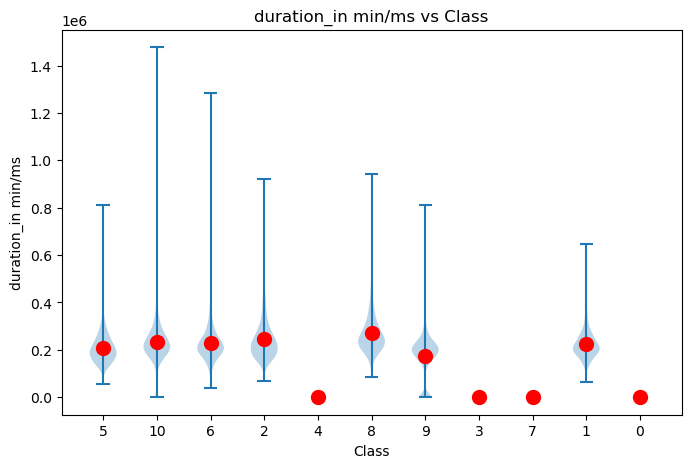

In [12]:
#violin plots
for cont_var in vars_cont:
    for cat_var in vars_cat:
        plt.figure(figsize=(8, 5))
        data = [df[cont_var][df[cat_var] == category].dropna() for category in df[cat_var].unique()]
        data = [d for d in data if len(d) > 0]
        plt.violinplot(data, positions=range(1, len(data) + 1))
        means = [d.mean() for d in data]
        #adding a mean to the violinplot
        for position, mean in zip(range(1, len(means) + 1), means):
            plt.scatter([position], [mean], color='red', label='Mean' if position == 1 else "", s=100, zorder=5)
        plt.xticks(range(1, len(data) + 1), df[cat_var].unique()[[len(df[cat_var][df[cat_var] == category]) > 0 for category in df[cat_var].unique()]])
        plt.title(f"{cont_var} vs {cat_var}")
        plt.ylabel(cont_var)
        plt.xlabel(cat_var)
        plt.show()

Interesting observations: 
(“Graphs” refer to both violin and box plots)

In the graphs showing danceability versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher danceability level than other time signatures (1,3 or 5) with the highest mean, median, max/min values and first/third quartiles.

In the graphs showing danceability versus class, the songs in hiphop(5) or pop(9) have a higher danceability level than other classes as they have higher mean, median, max/min values and first/third quartiles.

In the graphs showing energy versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher energy level than other time signatures (1,3 or 5) with the highest mean, median, max/min values and first/third quartiles.

In the graphs showing energy versus class, the songs in metal(8) have a higher energy level than other classes as it has higher mean, median, max/min values and first/third quartiles. On the contrary, instrumental(7) is the class with the lowest energy on a general level. 

In the graphs showing speechiness versus class, the songs in hiphop(5) have a higher speechiness level than other classes as it has higher mean, medan and maximum values.

In the graphs showing acousticness versus class, the songs in bollywood(3) and instrumental(7) have a higher acousticness level than other classes as they have higher mean, median, max/min values and first/third quartiles.

In the graphs showing instrumentalness versus class, the songs in instrumental(7), not surprisingly, have a higher instrumentalness level than other classes, while country(4), hiphop(5) and pop(9) have the lowest instrumentalness level (country is the lowest among them as it doesn’t have as many outliers having high values as hiphop or pop).

In the graphs showing liveness versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher liveness level than other time signatures (1,3 or 5) with the highest mean, median, maximum value and first/third quartiles.

In the graphs showing valence versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher valence level than other time signatures (1,3 or 5) with the highest mean, median, maximum value and first/third quartiles.

In the graphs showing valence versus class, the songs in metal(8) and instrumental(7) are the classes with the lowest valence on a general level (with lower mean, median, max/min values and first/third quartiles).



Part 2. Splitting and preprocessing

In [21]:
#dropping the "Artist Name" and "Track Name" columns since they do not include effective information
df = df.drop(columns=["Artist Name", "Track Name"])

In [22]:
#dealing with missing values
#first get an overview of how the missing values look like 
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print("fraction of missing values in features:")
print(perc_missing_per_ftr[perc_missing_per_ftr>0])
print("data types of the features with missing values:")
print(df[perc_missing_per_ftr[perc_missing_per_ftr>0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print("fraction of points with missing values:",frac_missing)

fraction of missing values in features:
Popularity          0.023783
key                 0.111914
instrumentalness    0.243221
dtype: float64
data types of the features with missing values:
Popularity          float64
key                 float64
instrumentalness    float64
dtype: object
fraction of points with missing values: 0.34357635030006667


In [ ]:
#dealing with missing values
#df_cleaned = df.dropna()???

In [26]:
#splitting the data
#since we have an imbalanced data as we can see from the bar plot for "Class"
#and assuming the tracks are chosen randomly
#we should use a stratified split
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Class"])
y = df["Class"]
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance with stratification:**
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 375,  824,  763,  241,  232,  868, 1552,  346, 1113, 1514, 2969]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([125, 274, 255,  81,  78, 289, 517, 115, 370, 505, 990]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([125, 275, 254,  80,  77, 290, 518, 115, 371, 505, 990]))


In [36]:
#preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

onehot_ftrs = ["key","mode","time_signature"]
minmax_ftrs = ["acousticness","instrumentalness"]
std_ftrs = ["Popularity","danceability","energy","acousticness","instrumentalness","liveness","valence","tempo","duration_in min/ms"]
#treat missing key as an unknown key (maybe because there're key changes in the song)
#define the missing key as 0
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='constant',fill_value=0)),
('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
transformers=[
('onehot', categorical_transformer, onehot_ftrs),
('minmax', MinMaxScaler(), minmax_ftrs),
('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val.shape)
print(X_val_prep.shape)
print(X_val_prep)
print(X_test.shape)
print(X_test_prep.shape)
print(X_test_prep)

(10797, 14)
(10797, 29)
[[ 0.          0.          0.         ...  1.5577134  -0.78146173
   0.34511484]
 [ 0.          0.          1.         ...  1.03668756 -0.50081477
   0.11882933]
 [ 0.          0.          0.         ... -0.426353   -0.26021207
   0.99508732]
 ...
 [ 0.          0.          0.         ...  0.86162288  0.14107332
   0.22304536]
 [ 0.          0.          0.         ... -1.83145549  0.58196478
   0.09812548]
 [ 1.          0.          0.         ...  1.98703869  0.19665665
   0.25924091]]
(3599, 14)
(3599, 29)
[[ 0.          1.          0.         ... -1.69140374 -0.76733838
   0.12410484]
 [ 0.          0.          0.         ...  1.49102209 -0.79373119
  -0.51329874]
 [ 0.          0.          0.         ... -0.58474485 -1.19966819
  -1.80991164]
 ...
 [ 0.          0.          0.         ... -1.31418103  0.10810758
   1.65397296]
 [ 0.          0.          0.         ... -1.20163945  0.44480978
  -1.80989955]
 [ 0.          0.          0.         ...  0.7865951

In [ ]:
#Exploring feature importance using f_classif and the correlation matrix (after prepocessing!)
